In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [2]:
df = pd.read_csv('bank_marketing_part1_Data.csv')

In [3]:
dataset = df.copy()

In [4]:
dataset.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0         3.763            3.252                         6.550  
1         3.582            3.336                         5.144  
2         3.755            3.368                         6.148  
3         2.641            5.182                         5.185  
4         3.694            2.068                         5.837

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
df.describe().T

count       mean       std      min       25%  \
spending                      210.0  14.847524  2.909699  10.5900  12.27000   
advance_payments              210.0  14.559286  1.305959  12.4100  13.45000   
probability_of_full_payment   210.0   0.870999  0.023629   0.8081   0.85690   
current_balance               210.0   5.628533  0.443063   4.8990   5.26225   
credit_limit                  210.0   3.258605  0.377714   2.6300   2.94400   
min_payment_amt               210.0   3.700201  1.503557   0.7651   2.56150   
max_spent_in_single_shopping  210.0   5.408071  0.491480   4.5190   5.04500   

                                   50%        75%      max  
spending                      14.35500  17.305000  21.1800  
advance_payments              14.32000  15.715000  17.2500  
probability_of_full_payment    0.87345   0.887775   0.9183  
current_balance                5.52350   5.979750   6.6750  
credit_limit                   3.23700   3.561750   4.0330  
min_payment_amt                3.59900   4.768750   8.4560  
max_spent_in_single_shopping   5.22300   5.877000   6.5500

In [7]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [8]:
print(df.dtypes)

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object


In [9]:
df.shape

(210, 7)

<AxesSubplot:xlabel='max_spent_in_single_shopping', ylabel='Count'>

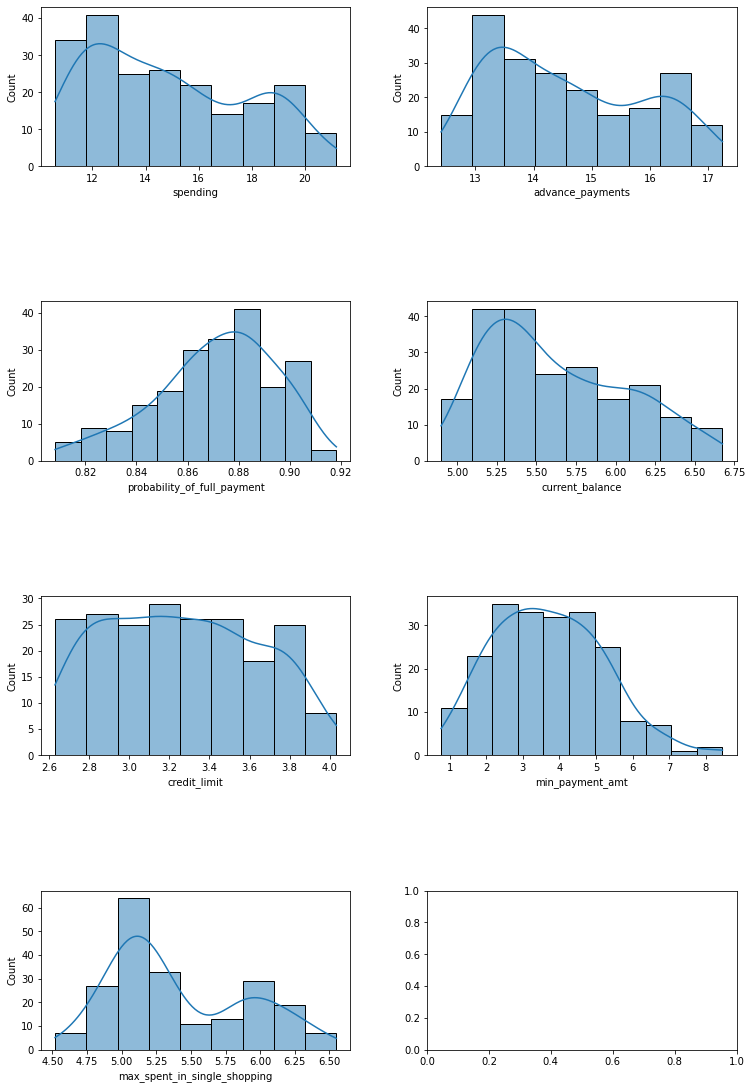

In [10]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.tight_layout()
fig.set_size_inches(11,17)
sns.histplot(df['spending'], kde=True, ax=axes[0][0])
sns.histplot(df['advance_payments'], kde=True, ax=axes[0][1])
sns.histplot(df['probability_of_full_payment'], kde=True, ax=axes[1][0])
sns.histplot(df['current_balance'], kde=True, ax=axes[1][1])
sns.histplot(df['credit_limit'], kde=True, ax=axes[2][0])
sns.histplot(df['min_payment_amt'], kde=True, ax=axes[2][1])
sns.histplot(df['max_spent_in_single_shopping'], kde=True, ax=axes[3][0])

In [11]:
df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

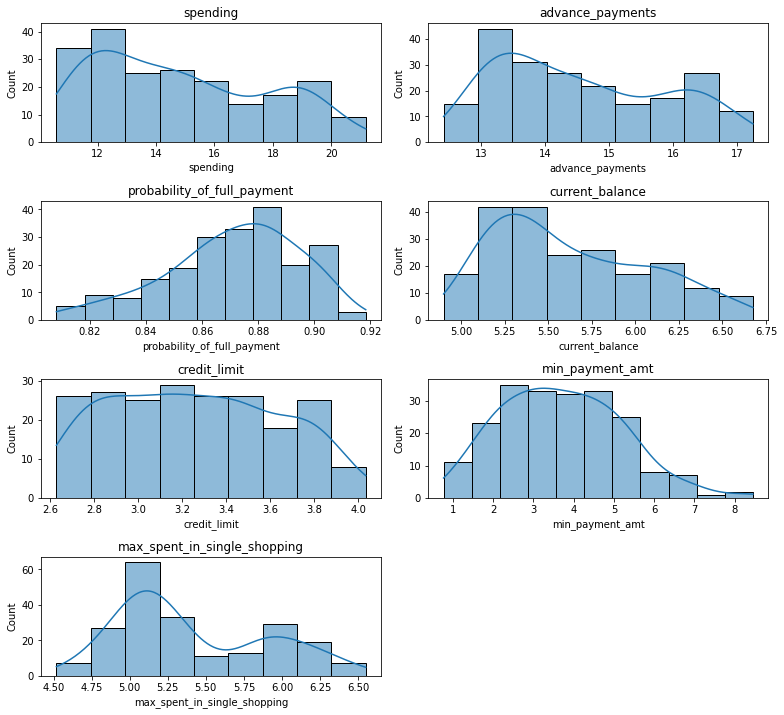

In [12]:
df_col = df.columns
a = len(df_col)
b = 2
c = 1 
fig = plt.figure(figsize=(11,17))
for i in df_col:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    plt.xlabel(i)
    sns.histplot(df[i],kde='True')
    c = c + 1
plt.tight_layout()
plt.show()

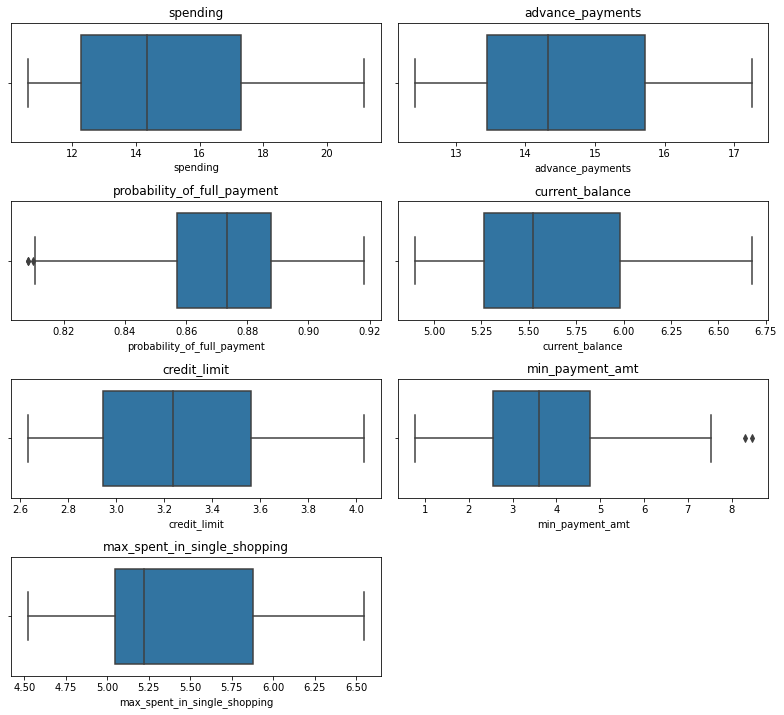

In [13]:
df_col = df.columns
a = len(df_col)
b = 2
c = 1 
fig = plt.figure(figsize=(11,17))
for i in df_col:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    plt.xlabel(i)
    sns.boxplot(df[i])
    c = c + 1
plt.tight_layout()
plt.show()

<AxesSubplot:>

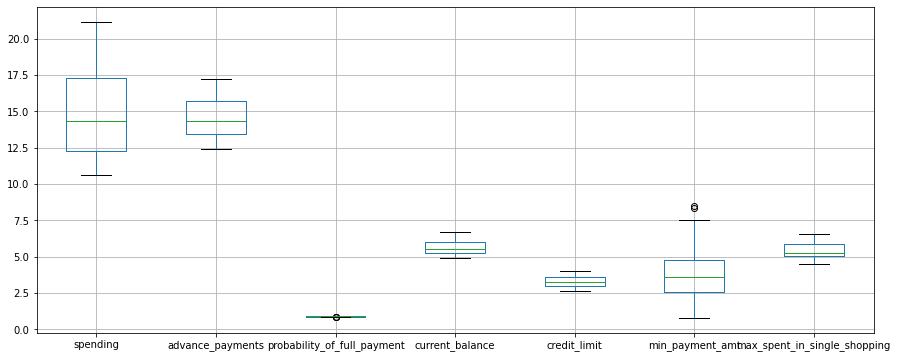

In [14]:
plt.figure(figsize=(15,6))
df.boxplot()

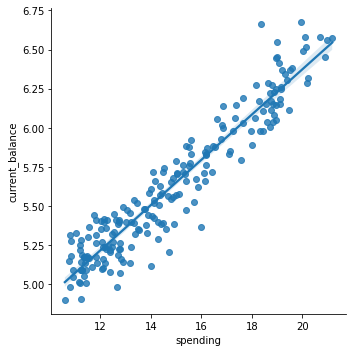

In [15]:
sns.lmplot(x = 'spending', y = 'current_balance', data = df);

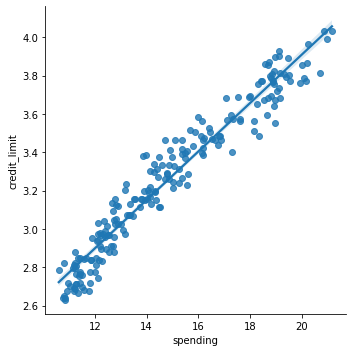

In [16]:
sns.lmplot(x = 'spending', y = 'credit_limit', data = df);

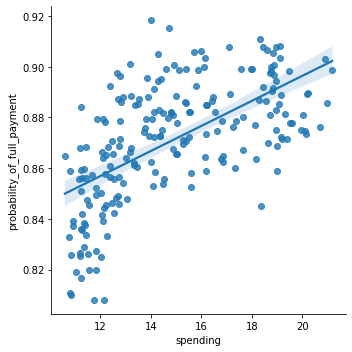

In [17]:
sns.lmplot(x = 'spending', y = 'probability_of_full_payment', data = df);

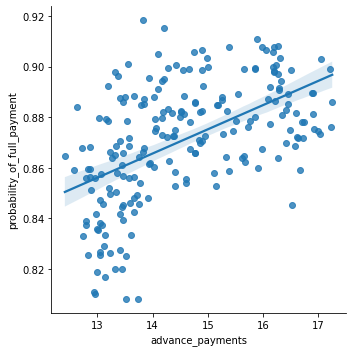

In [18]:
sns.lmplot(x = 'advance_payments', y = 'probability_of_full_payment', data = df);

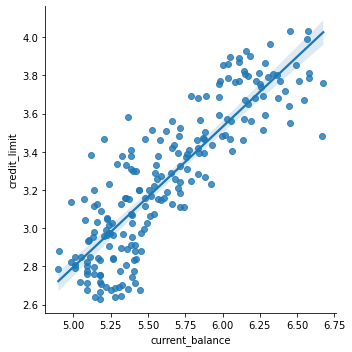

In [19]:
sns.lmplot(x = 'current_balance', y = 'credit_limit', data = df);

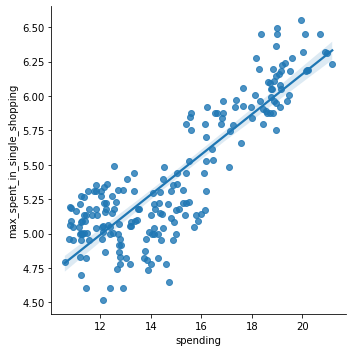

In [20]:
sns.lmplot(x = 'spending', y = 'max_spent_in_single_shopping', data = df);

In [21]:
df.skew()

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

In [22]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [23]:
outliers = find_outliers_IQR(df[['spending','advance_payments','probability_of_full_payment','current_balance',
                               'credit_limit','min_payment_amt','max_spent_in_single_shopping']])

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

outliers

number of outliers: 210
max outlier value: spending                           NaN
advance_payments                   NaN
probability_of_full_payment     0.8099
current_balance                    NaN
credit_limit                       NaN
min_payment_amt                 8.4560
max_spent_in_single_shopping       NaN
dtype: float64
min outlier value: spending                           NaN
advance_payments                   NaN
probability_of_full_payment     0.8081
current_balance                    NaN
credit_limit                       NaN
min_payment_amt                 8.3150
max_spent_in_single_shopping       NaN
dtype: float64


spending  advance_payments  probability_of_full_payment  current_balance  \
0         NaN               NaN                          NaN              NaN   
1         NaN               NaN                          NaN              NaN   
2         NaN               NaN                          NaN              NaN   
3         NaN               NaN                       0.8099              NaN   
4         NaN               NaN                          NaN              NaN   
..        ...               ...                          ...              ...   
205       NaN               NaN                          NaN              NaN   
206       NaN               NaN                          NaN              NaN   
207       NaN               NaN                          NaN              NaN   
208       NaN               NaN                          NaN              NaN   
209       NaN               NaN                          NaN              NaN   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  
0             NaN              NaN                           NaN  
1             NaN              NaN                           NaN  
2             NaN              NaN                           NaN  
3             NaN              NaN                           NaN  
4             NaN              NaN                           NaN  
..            ...              ...                           ...  
205           NaN              NaN                           NaN  
206           NaN              NaN                           NaN  
207           NaN              NaN                           NaN  
208           NaN              NaN                           NaN  
209           NaN              NaN                           NaN  

[210 rows x 7 columns]

In [24]:
outliers.nunique()

spending                        0
advance_payments                0
probability_of_full_payment     3
current_balance                 0
credit_limit                    0
min_payment_amt                 2
max_spent_in_single_shopping    0
dtype: int64

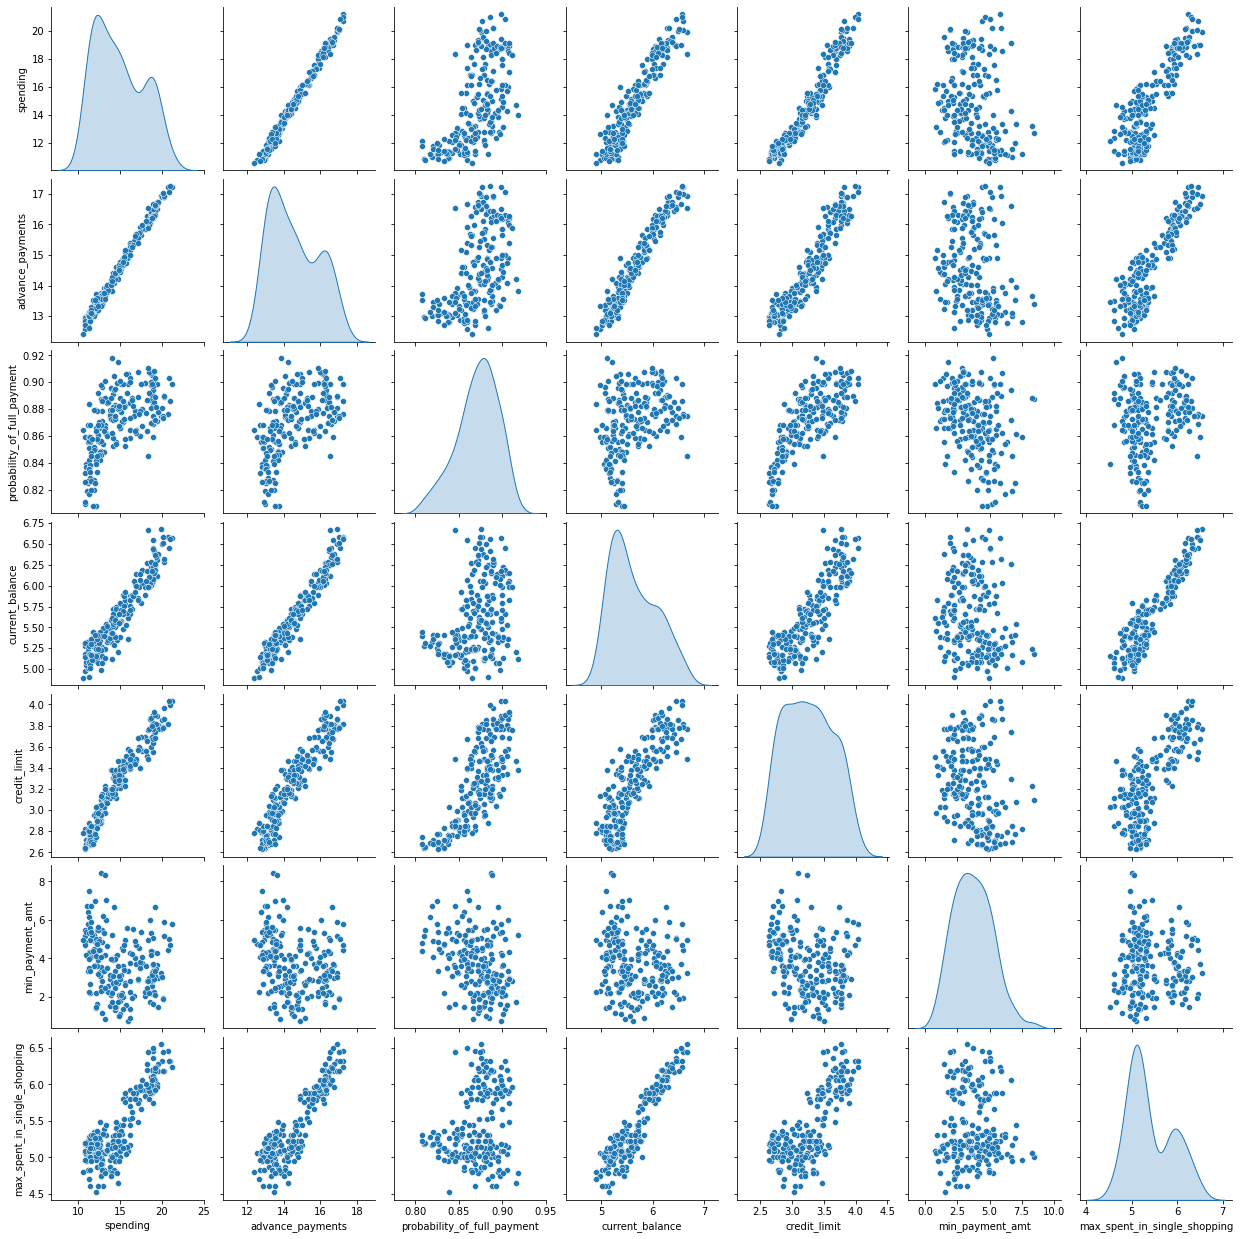

In [25]:
sns.pairplot(data = df, diag_kind = 'kde');

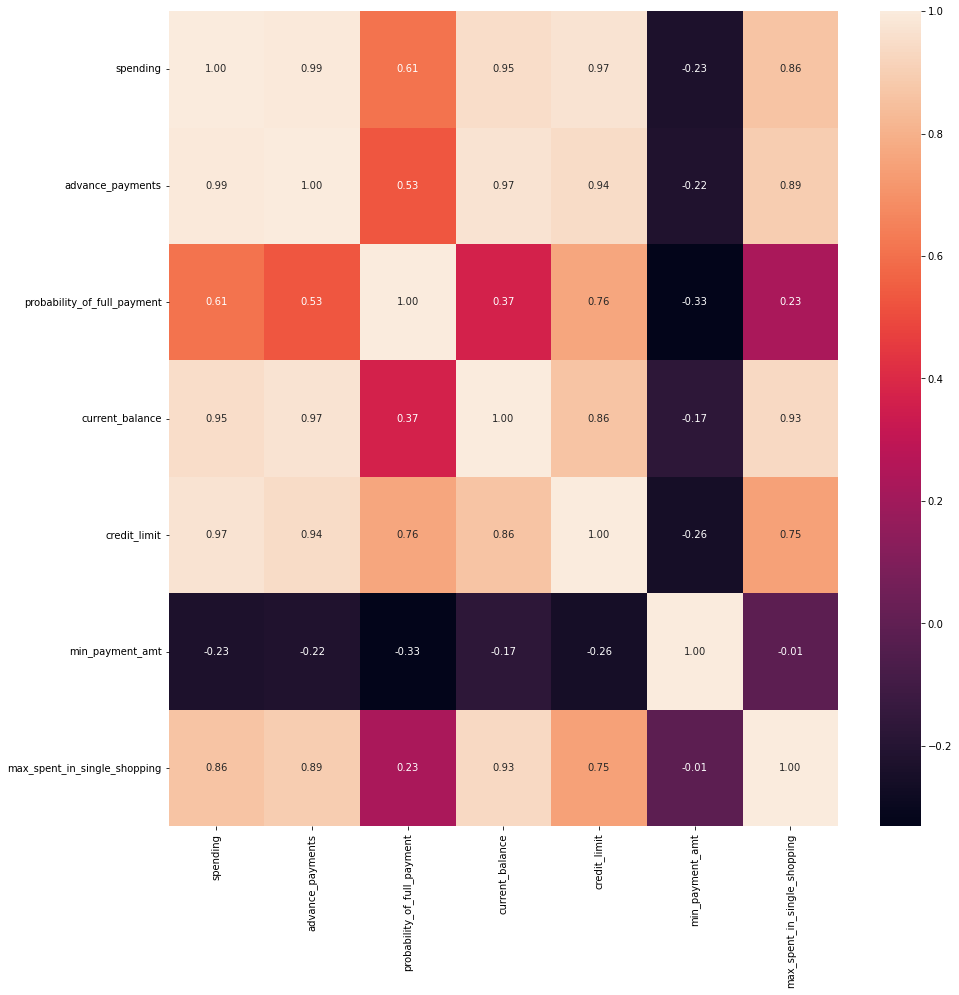

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

## 1.2  Do you think scaling is necessary for clustering in this case? Justify

In [27]:
from scipy.stats import zscore
df_scaled =  df.apply(zscore)
df_scaled.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0  1.754355          1.811968                     0.178230         2.367533   
1  0.393582          0.253840                     1.501773        -0.600744   
2  1.413300          1.428192                     0.504874         1.401485   
3 -1.384034         -1.227533                    -2.591878        -0.793049   
4  1.082581          0.998364                     1.196340         0.591544   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0      1.338579        -0.298806                      2.328998  
1      0.858236        -0.242805                     -0.538582  
2      1.317348        -0.221471                      1.509107  
3     -1.639017         0.987884                     -0.454961  
4      1.155464        -1.088154                      0.874813

In [28]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
df_scaled1 =  X.fit_transform(dataset)
df_scaled1 = pd.DataFrame(df_scaled1,columns=dataset.columns)
df_scaled1.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0  1.754355          1.811968                     0.178230         2.367533   
1  0.393582          0.253840                     1.501773        -0.600744   
2  1.413300          1.428192                     0.504874         1.401485   
3 -1.384034         -1.227533                    -2.591878        -0.793049   
4  1.082581          0.998364                     1.196340         0.591544   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0      1.338579        -0.298806                      2.328998  
1      0.858236        -0.242805                     -0.538582  
2      1.317348        -0.221471                      1.509107  
3     -1.639017         0.987884                     -0.454961  
4      1.155464        -1.088154                      0.874813

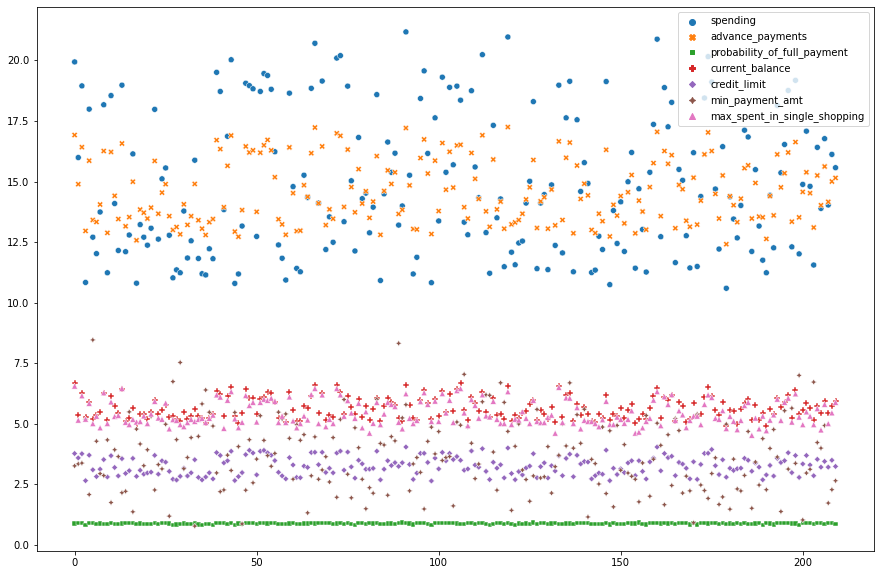

In [29]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = df);

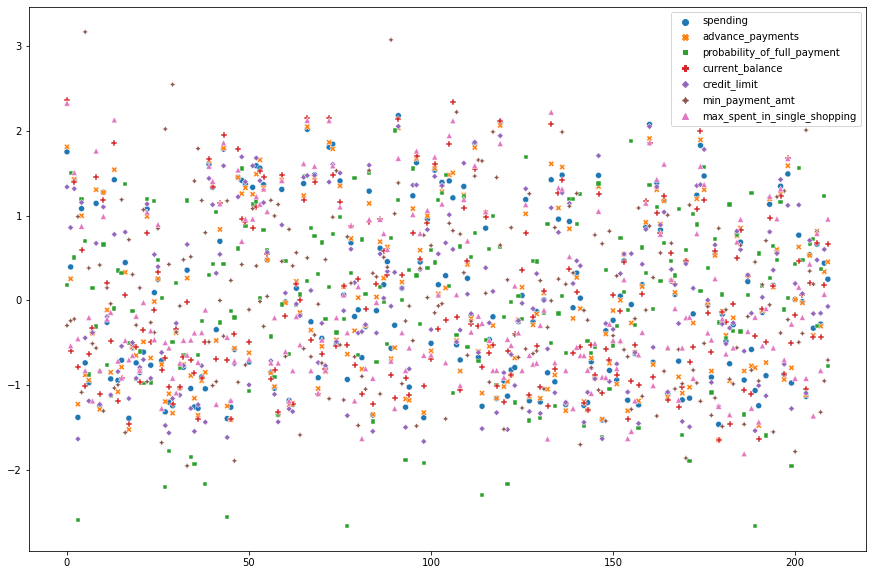

In [30]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = df_scaled);

In [31]:
df.var()

spending                        8.466351
advance_payments                1.705528
probability_of_full_payment     0.000558
current_balance                 0.196305
credit_limit                    0.142668
min_payment_amt                 2.260684
max_spent_in_single_shopping    0.241553
dtype: float64

In [32]:
df.std()

spending                        2.909699
advance_payments                1.305959
probability_of_full_payment     0.023629
current_balance                 0.443063
credit_limit                    0.377714
min_payment_amt                 1.503557
max_spent_in_single_shopping    0.491480
dtype: float64

In [33]:
df_scaled.std()

spending                        1.002389
advance_payments                1.002389
probability_of_full_payment     1.002389
current_balance                 1.002389
credit_limit                    1.002389
min_payment_amt                 1.002389
max_spent_in_single_shopping    1.002389
dtype: float64

In [34]:
df_scaled.var()

spending                        1.004785
advance_payments                1.004785
probability_of_full_payment     1.004785
current_balance                 1.004785
credit_limit                    1.004785
min_payment_amt                 1.004785
max_spent_in_single_shopping    1.004785
dtype: float64

## 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [35]:
import scipy.cluster.hierarchy as shc

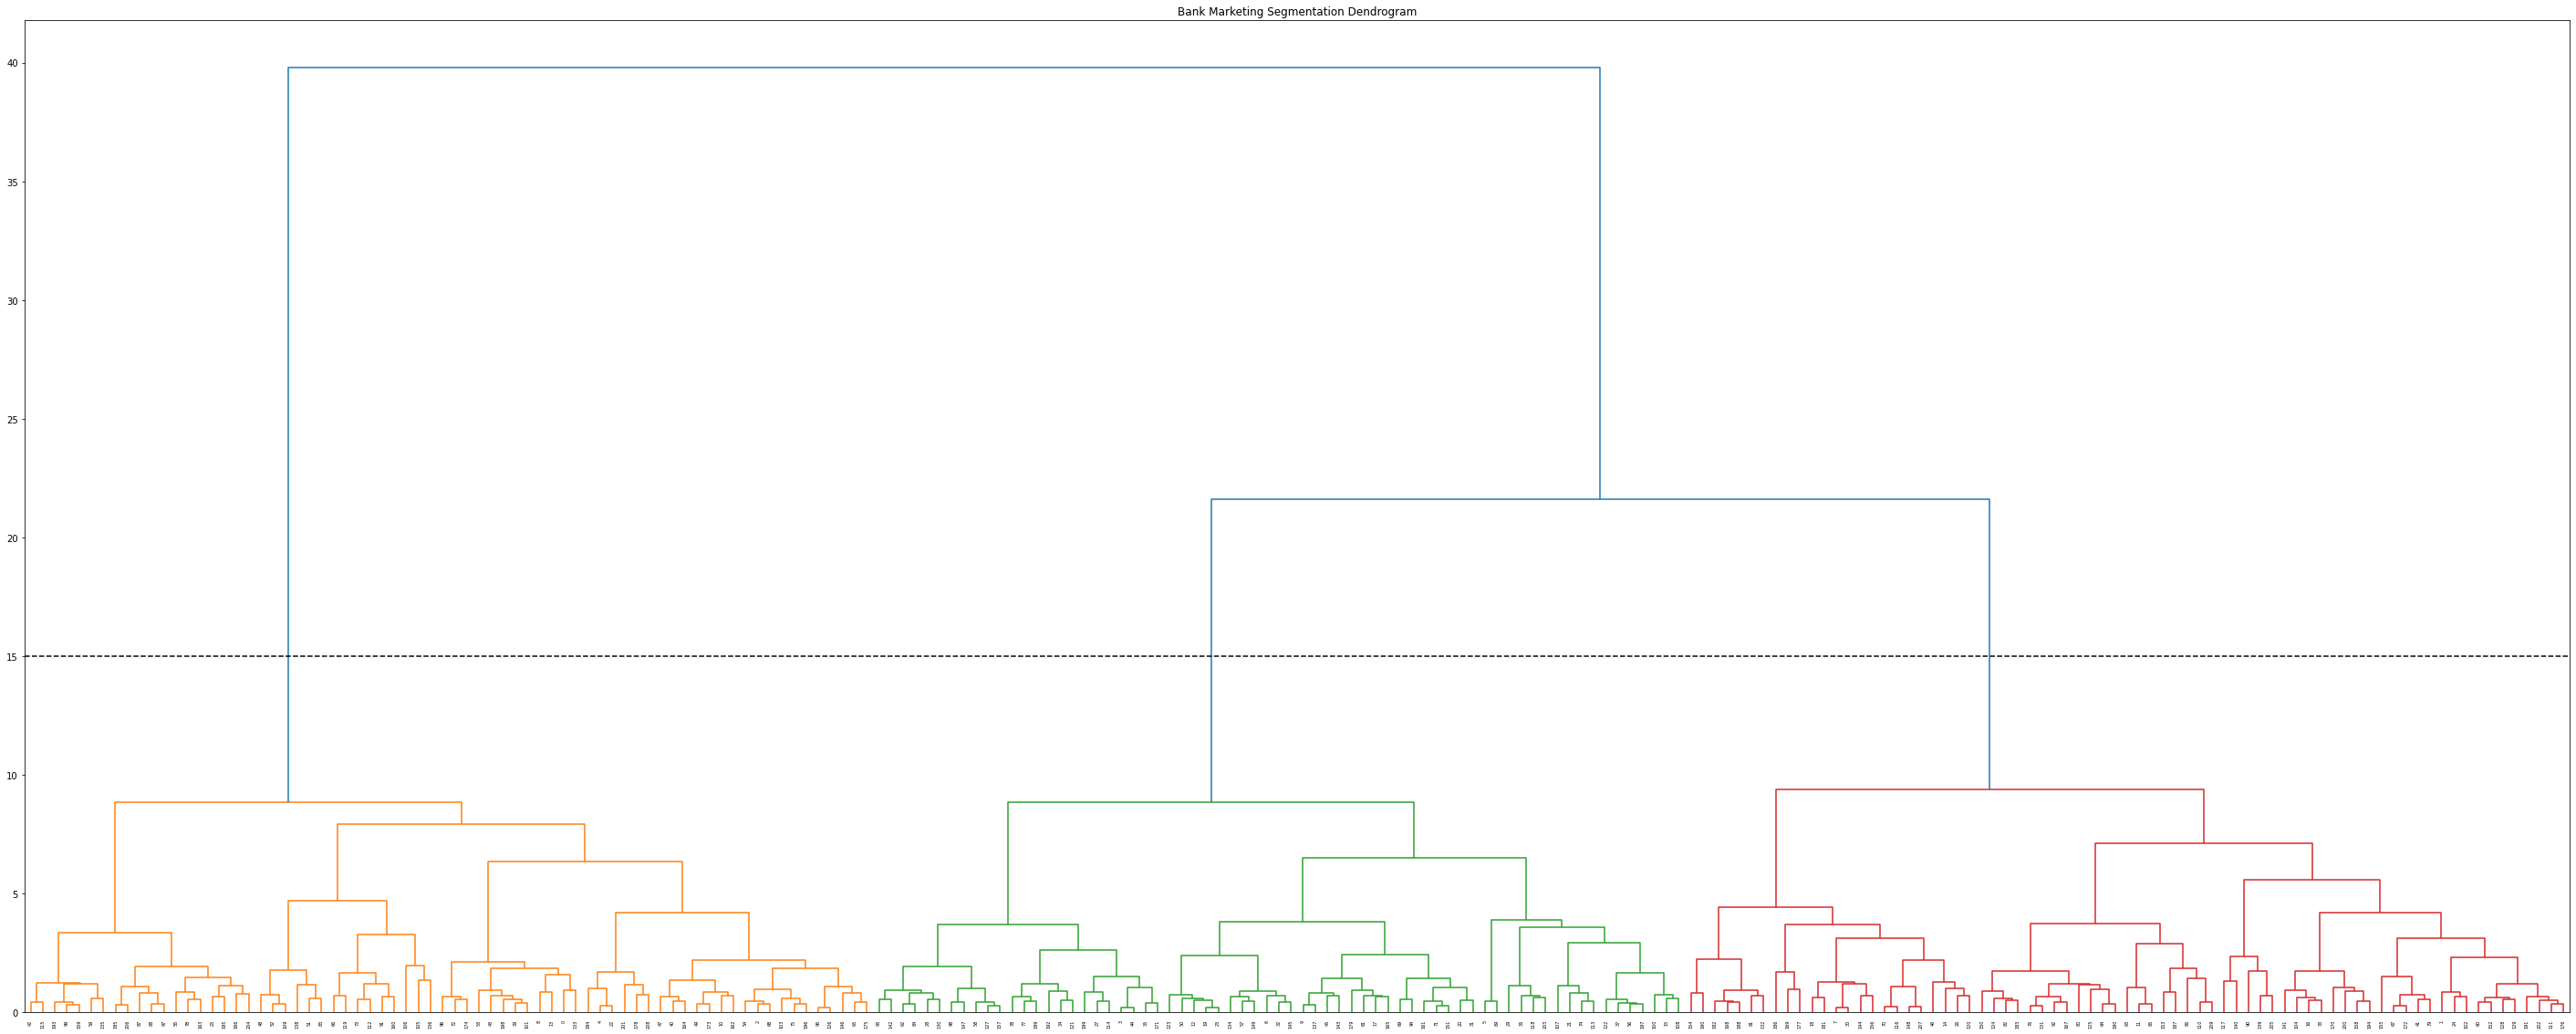

In [36]:
plt.figure(figsize=(50, 20))
plt.title("Bank Marketing Segmentation Dendrogram")
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'),color_threshold=10)
plt.axhline(15, color='black', linestyle='--')
plt.show()

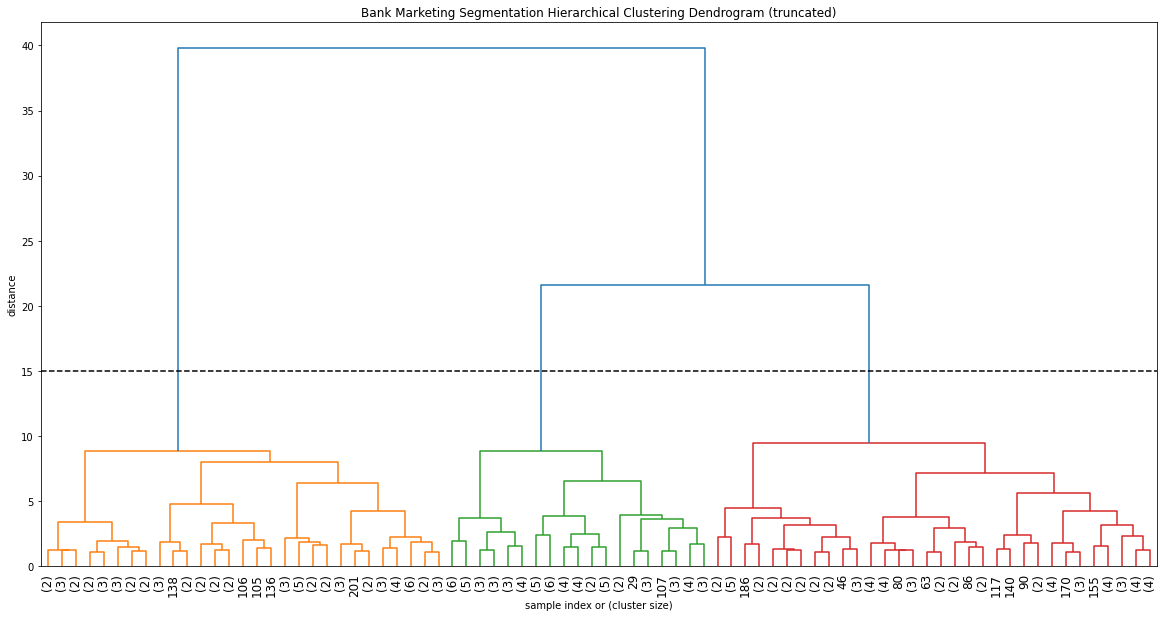

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z_Final = linkage(df_scaled, 'ward', metric='euclidean')
plt.figure(figsize=(20, 10))
plt.title('Bank Marketing Segmentation Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z_Final,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=80,  # show only the last p merged clusters
    leaf_rotation=90,
    leaf_font_size=12,
    color_threshold=10
)
plt.axhline(15, color='black', linestyle='--')
plt.show()

In [38]:
clusters_1 = shc.fcluster(shc.linkage(df_scaled, method='ward'), 3, criterion='maxclust')# Here 3 is number of clusters we want
clusters_1

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [39]:
df['cluster_1']= clusters_1
df.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  cluster_1  
0         3.763            3.252                         6.550          1  
1         3.582            3.336                         5.144          3  
2         3.755            3.368                         6.148          1  
3         2.641            5.182                         5.185          2  
4         3.694            2.068                         5.837          1

## 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [40]:

df_clust_1 = df.groupby('cluster_1').mean()
cluster_1_freq = df['cluster_1'].value_counts().sort_index()
df_clust_1['cluster count'] = cluster_1_freq
df_clust_1

spending  advance_payments  probability_of_full_payment  \
cluster_1                                                             
1          18.371429         16.145429                     0.884400   
2          11.872388         13.257015                     0.848072   
3          14.199041         14.233562                     0.879190   

           current_balance  credit_limit  min_payment_amt  \
cluster_1                                                   
1                 6.158171      3.684629         3.639157   
2                 5.238940      2.848537         4.949433   
3                 5.478233      3.226452         2.612181   

           max_spent_in_single_shopping  cluster count  
cluster_1                                               
1                              6.017371             70  
2                              5.122209             67  
3                              5.086178             73

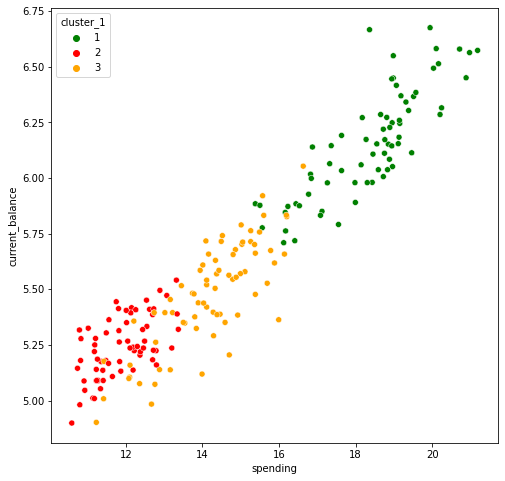

In [41]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = 'spending', y = 'current_balance', data = df, hue = 'cluster_1', 
                    palette=['green','red','orange'], legend='full');


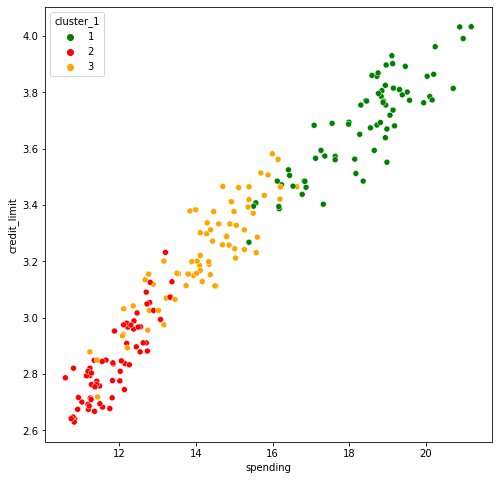

In [42]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = 'spending', y = 'credit_limit', data = df, hue = 'cluster_1', 
                    palette=['green','red','orange'], legend='full');

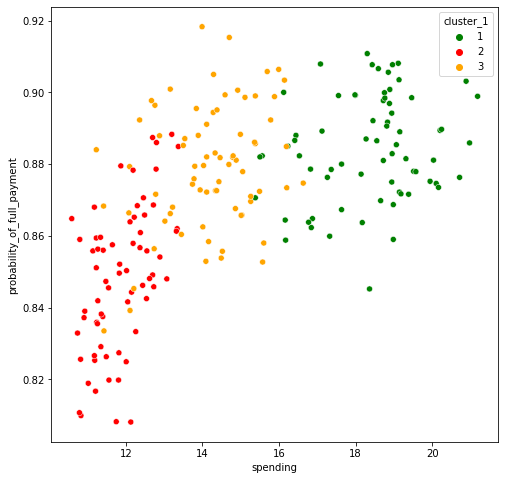

In [43]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = 'spending', y = 'probability_of_full_payment', data = df, hue = 'cluster_1', 
                    palette=['green','red','orange'], legend='full');

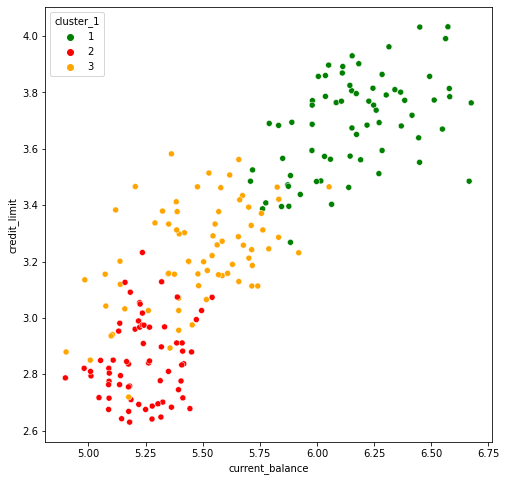

In [44]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = 'current_balance', y = 'credit_limit', data = df, hue = 'cluster_1', 
                    palette=['green','red','orange'], legend='full');

## 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [45]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 1)
    kmeans.fit(df_scaled)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

In [113]:

for i in range(2,11):
    print('The WSS value for',i,'clusters is',wcss[i-2])

The WSS value for 2 clusters is 1470.0000000000002
The WSS value for 3 clusters is 659.1717544870406
The WSS value for 4 clusters is 430.6589731513006
The WSS value for 5 clusters is 371.30172127754213
The WSS value for 6 clusters is 327.96082400790317
The WSS value for 7 clusters is 290.590030596822
The WSS value for 8 clusters is 264.8315308747815
The WSS value for 9 clusters is 240.68372595015978
The WSS value for 10 clusters is 220.85285825594738


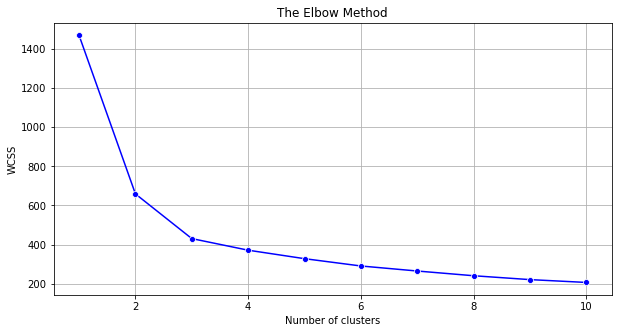

In [47]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='blue')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [48]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df_scaled)
labels_4 = k_means.labels_
labels_4

array([1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1,
       2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2])

In [49]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df_scaled)
labels_3 = k_means.labels_
labels_3

array([1, 0, 1, 3, 1, 3, 3, 0, 1, 3, 1, 0, 3, 1, 0, 3, 0, 3, 0, 3, 3, 3,
       1, 3, 0, 2, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 1, 1, 0, 2, 1,
       3, 3, 0, 1, 1, 1, 3, 1, 1, 1, 1, 2, 3, 3, 3, 1, 0, 3, 3, 2, 0, 1,
       1, 0, 1, 0, 0, 3, 1, 1, 3, 1, 0, 3, 2, 0, 0, 0, 0, 1, 3, 2, 2, 2,
       2, 3, 0, 1, 0, 3, 0, 1, 1, 2, 3, 2, 0, 1, 2, 1, 0, 1, 1, 3, 0, 1,
       2, 0, 1, 3, 3, 2, 0, 0, 3, 1, 0, 3, 3, 3, 0, 0, 1, 3, 0, 0, 3, 0,
       0, 1, 3, 1, 1, 3, 2, 0, 2, 0, 3, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 2,
       0, 0, 0, 3, 0, 2, 1, 3, 1, 2, 1, 3, 2, 0, 0, 3, 0, 3, 0, 1, 1, 1,
       0, 0, 2, 3, 0, 0, 0, 0, 2, 2, 0, 2, 0, 3, 0, 0, 3, 1, 0, 2, 1, 3,
       1, 3, 0, 2, 0, 3, 2, 0, 2, 0, 2, 2])

In [50]:
df['kmeans_cluster_4']= labels_4
df['kmeans_cluster_3']= labels_3
df.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  cluster_1  \
0         3.763            3.252                         6.550          1   
1         3.582            3.336                         5.144          3   
2         3.755            3.368                         6.148          1   
3         2.641            5.182                         5.185          2   
4         3.694            2.068                         5.837          1   

   kmeans_cluster_4  kmeans_cluster_3  
0                 1                 1  
1                 2                 0  
2                 1                 1  
3                 0                 3  
4                 1                 1

In [51]:
labels_3.shape

(210,)

In [52]:
df.shape

(210, 10)

In [53]:
df['Hierarchical Clustering Clusters'] = clusters_1
df['KMeans Clustering Clusters'] = labels_4
df.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  cluster_1  \
0         3.763            3.252                         6.550          1   
1         3.582            3.336                         5.144          3   
2         3.755            3.368                         6.148          1   
3         2.641            5.182                         5.185          2   
4         3.694            2.068                         5.837          1   

   kmeans_cluster_4  kmeans_cluster_3  Hierarchical Clustering Clusters  \
0                 1                 1                                 1   
1                 2                 0                                 3   
2                 1                 1                                 1   
3                 0                 3                                 2   
4                 1                 1                                 1   

   KMeans Clustering Clusters  
0                           1  
1                           2  
2                           1  
3                           0  
4                           1

In [54]:
df.drop(['kmeans_cluster_4','kmeans_cluster_3'],axis=1,inplace=True)

In [55]:
df.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  cluster_1  \
0         3.763            3.252                         6.550          1   
1         3.582            3.336                         5.144          3   
2         3.755            3.368                         6.148          1   
3         2.641            5.182                         5.185          2   
4         3.694            2.068                         5.837          1   

   Hierarchical Clustering Clusters  KMeans Clustering Clusters  
0                                 1                           1  
1                                 3                           2  
2                                 1                           1  
3                                 2                           0  
4                                 1                           1

In [115]:
df.drop('cluster_1',axis = 1, inplace = True)

In [117]:
df.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  \
0         3.763            3.252                         6.550   
1         3.582            3.336                         5.144   
2         3.755            3.368                         6.148   
3         2.641            5.182                         5.185   
4         3.694            2.068                         5.837   

   Hierarchical Clustering Clusters  KMeans Clustering Clusters  
0                                 1                           1  
1                                 3                           2  
2                                 1                           1  
3                                 2                           0  
4                                 1                           1

In [121]:
df_kmeans = df
df_kmeans.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  \
0         3.763            3.252                         6.550   
1         3.582            3.336                         5.144   
2         3.755            3.368                         6.148   
3         2.641            5.182                         5.185   
4         3.694            2.068                         5.837   

   Hierarchical Clustering Clusters  KMeans Clustering Clusters  
0                                 1                           1  
1                                 3                           2  
2                                 1                           1  
3                                 2                           0  
4                                 1                           1

In [122]:
df_kmeans.drop('Hierarchical Clustering Clusters',axis = 1, inplace = True)
df_kmeans.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  \
0         3.763            3.252                         6.550   
1         3.582            3.336                         5.144   
2         3.755            3.368                         6.148   
3         2.641            5.182                         5.185   
4         3.694            2.068                         5.837   

   KMeans Clustering Clusters  
0                           1  
1                           2  
2                           1  
3                           0  
4                           1

## 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [125]:
df_kclust_4 = df_kmeans.groupby('KMeans Clustering Clusters').mean()
cluster_4_freq = df_kmeans['KMeans Clustering Clusters'].value_counts().sort_index()
df_kclust_4['cluster count'] = cluster_4_freq
df_kclust_4

spending  advance_payments  \
KMeans Clustering Clusters                                
0                           11.856944         13.247778   
1                           18.495373         16.203433   
2                           14.437887         14.337746   

                            probability_of_full_payment  current_balance  \
KMeans Clustering Clusters                                                 
0                                              0.848253         5.231750   
1                                              0.884210         6.175687   
2                                              0.881597         5.514577   

                            credit_limit  min_payment_amt  \
KMeans Clustering Clusters                                  
0                               2.849542         4.742389   
1                               3.697537         3.632373   
2                               3.259225         2.707341   

                            max_spent_in_single_shopping  cluster count  
KMeans Clustering Clusters                                               
0                                               5.101722             72  
1                                               6.041701             67  
2                                               5.120803             71

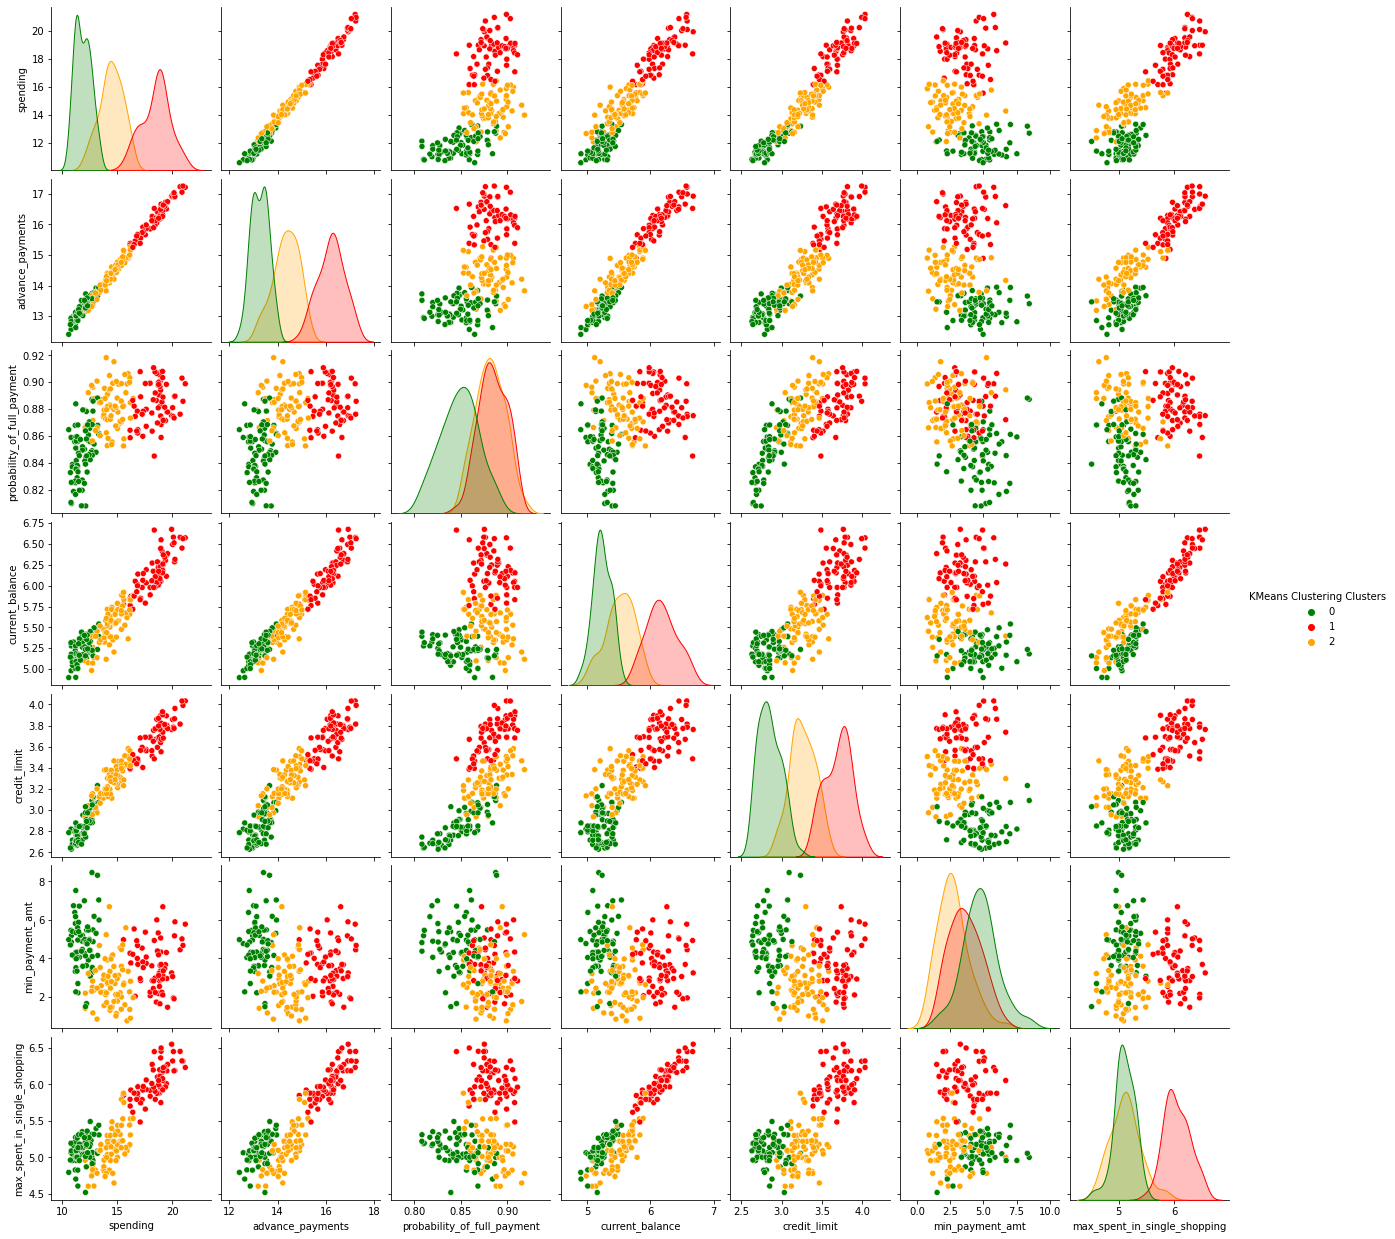

In [56]:
sns.pairplot(data = df[['spending', 'advance_payments','probability_of_full_payment','current_balance','credit_limit','min_payment_amt','max_spent_in_single_shopping','KMeans Clustering Clusters']],
                    palette=['green','red','orange'],hue = 'KMeans Clustering Clusters');

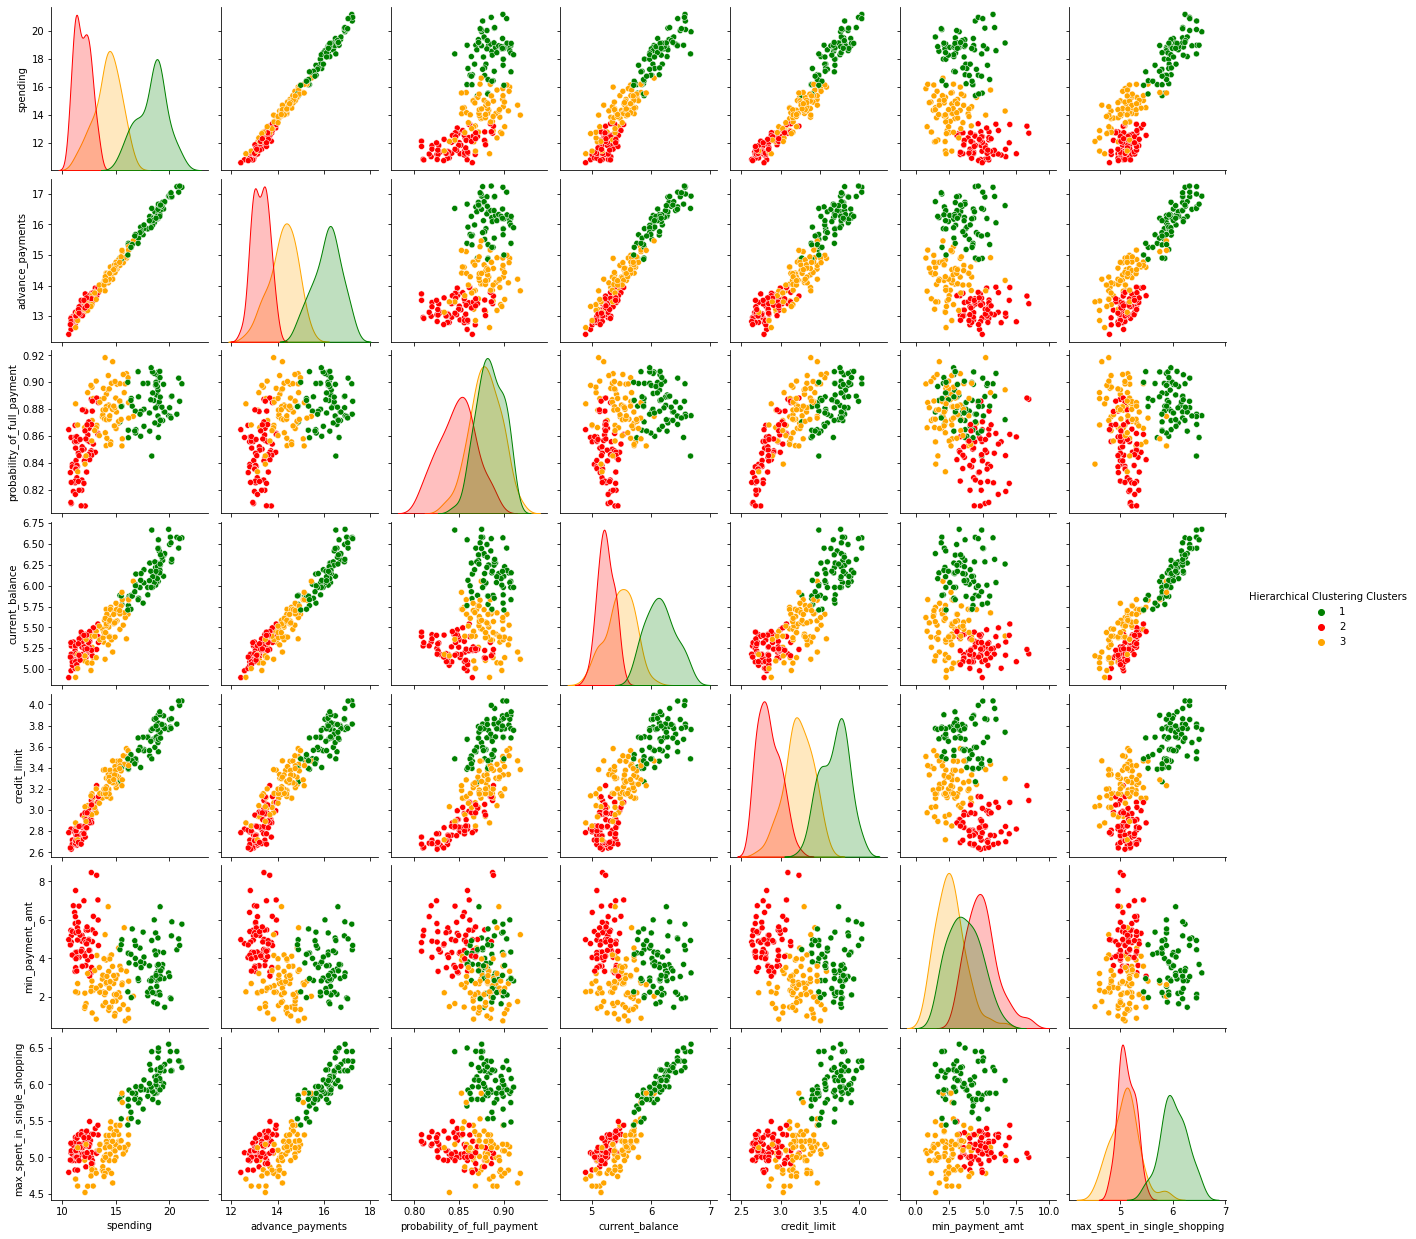

In [57]:
sns.pairplot(data = df[['spending', 'advance_payments','probability_of_full_payment','current_balance','credit_limit','min_payment_amt','max_spent_in_single_shopping','Hierarchical Clustering Clusters']],
                    palette=['green','red','orange'],hue = 'Hierarchical Clustering Clusters');

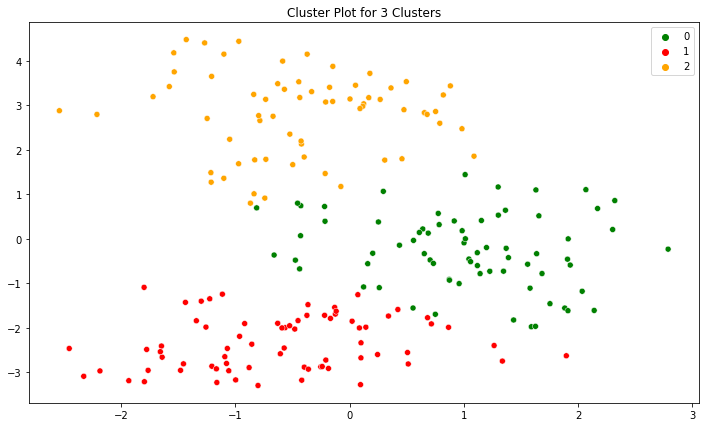

In [58]:
from sklearn.decomposition import PCA 
pca_2 = PCA(2) 
plot_columns = pca_2.fit_transform(df_scaled) 
plt.figure(figsize=(12,7)) 
sns.scatterplot(x=plot_columns[:,1], y=plot_columns[:,0], hue=KMeans(n_clusters=
3, random_state=0).fit(df_scaled).labels_, palette=['green','red','orange'],legend=True) 
plt.title('Cluster Plot for 3 Clusters')
plt.show()

## 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [171]:
insurance = pd.read_csv('insurance_part2_data.csv')
insurance.head()

Age Agency_Code           Type Claimed  Commision Channel  Duration  Sales  \
0   48         C2B       Airlines      No       0.70  Online         7   2.51   
1   36         EPX  Travel Agency      No       0.00  Online        34  20.00   
2   39         CWT  Travel Agency      No       5.94  Online         3   9.90   
3   36         EPX  Travel Agency      No       0.00  Online         4  26.00   
4   33         JZI       Airlines      No       6.30  Online        53  18.00   

        Product Name Destination  
0    Customised Plan        ASIA  
1    Customised Plan        ASIA  
2    Customised Plan    Americas  
3  Cancellation Plan        ASIA  
4        Bronze Plan        ASIA

In [172]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [173]:
insurance.dtypes

Age               int64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration          int64
Sales           float64
Product Name     object
Destination      object
dtype: object

In [174]:
insurance.describe(include = 'all').T

count unique              top  freq       mean         std  \
Age           3000.0    NaN              NaN   NaN     38.091   10.463518   
Agency_Code     3000      4              EPX  1365        NaN         NaN   
Type            3000      2    Travel Agency  1837        NaN         NaN   
Claimed         3000      2               No  2076        NaN         NaN   
Commision     3000.0    NaN              NaN   NaN  14.529203   25.481455   
Channel         3000      2           Online  2954        NaN         NaN   
Duration      3000.0    NaN              NaN   NaN  70.001333  134.053313   
Sales         3000.0    NaN              NaN   NaN  60.249913   70.733954   
Product Name    3000      5  Customised Plan  1136        NaN         NaN   
Destination     3000      3             ASIA  2465        NaN         NaN   

              min   25%   50%     75%     max  
Age           8.0  32.0  36.0    42.0    84.0  
Agency_Code   NaN   NaN   NaN     NaN     NaN  
Type          NaN   NaN   NaN     NaN     NaN  
Claimed       NaN   NaN   NaN     NaN     NaN  
Commision     0.0   0.0  4.63  17.235  210.21  
Channel       NaN   NaN   NaN     NaN     NaN  
Duration     -1.0  11.0  26.5    63.0  4580.0  
Sales         0.0  20.0  33.0    69.0   539.0  
Product Name  NaN   NaN   NaN     NaN     NaN  
Destination   NaN   NaN   NaN     NaN     NaN

In [175]:
insurance.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [176]:
insurance.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

In [200]:
insurance.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

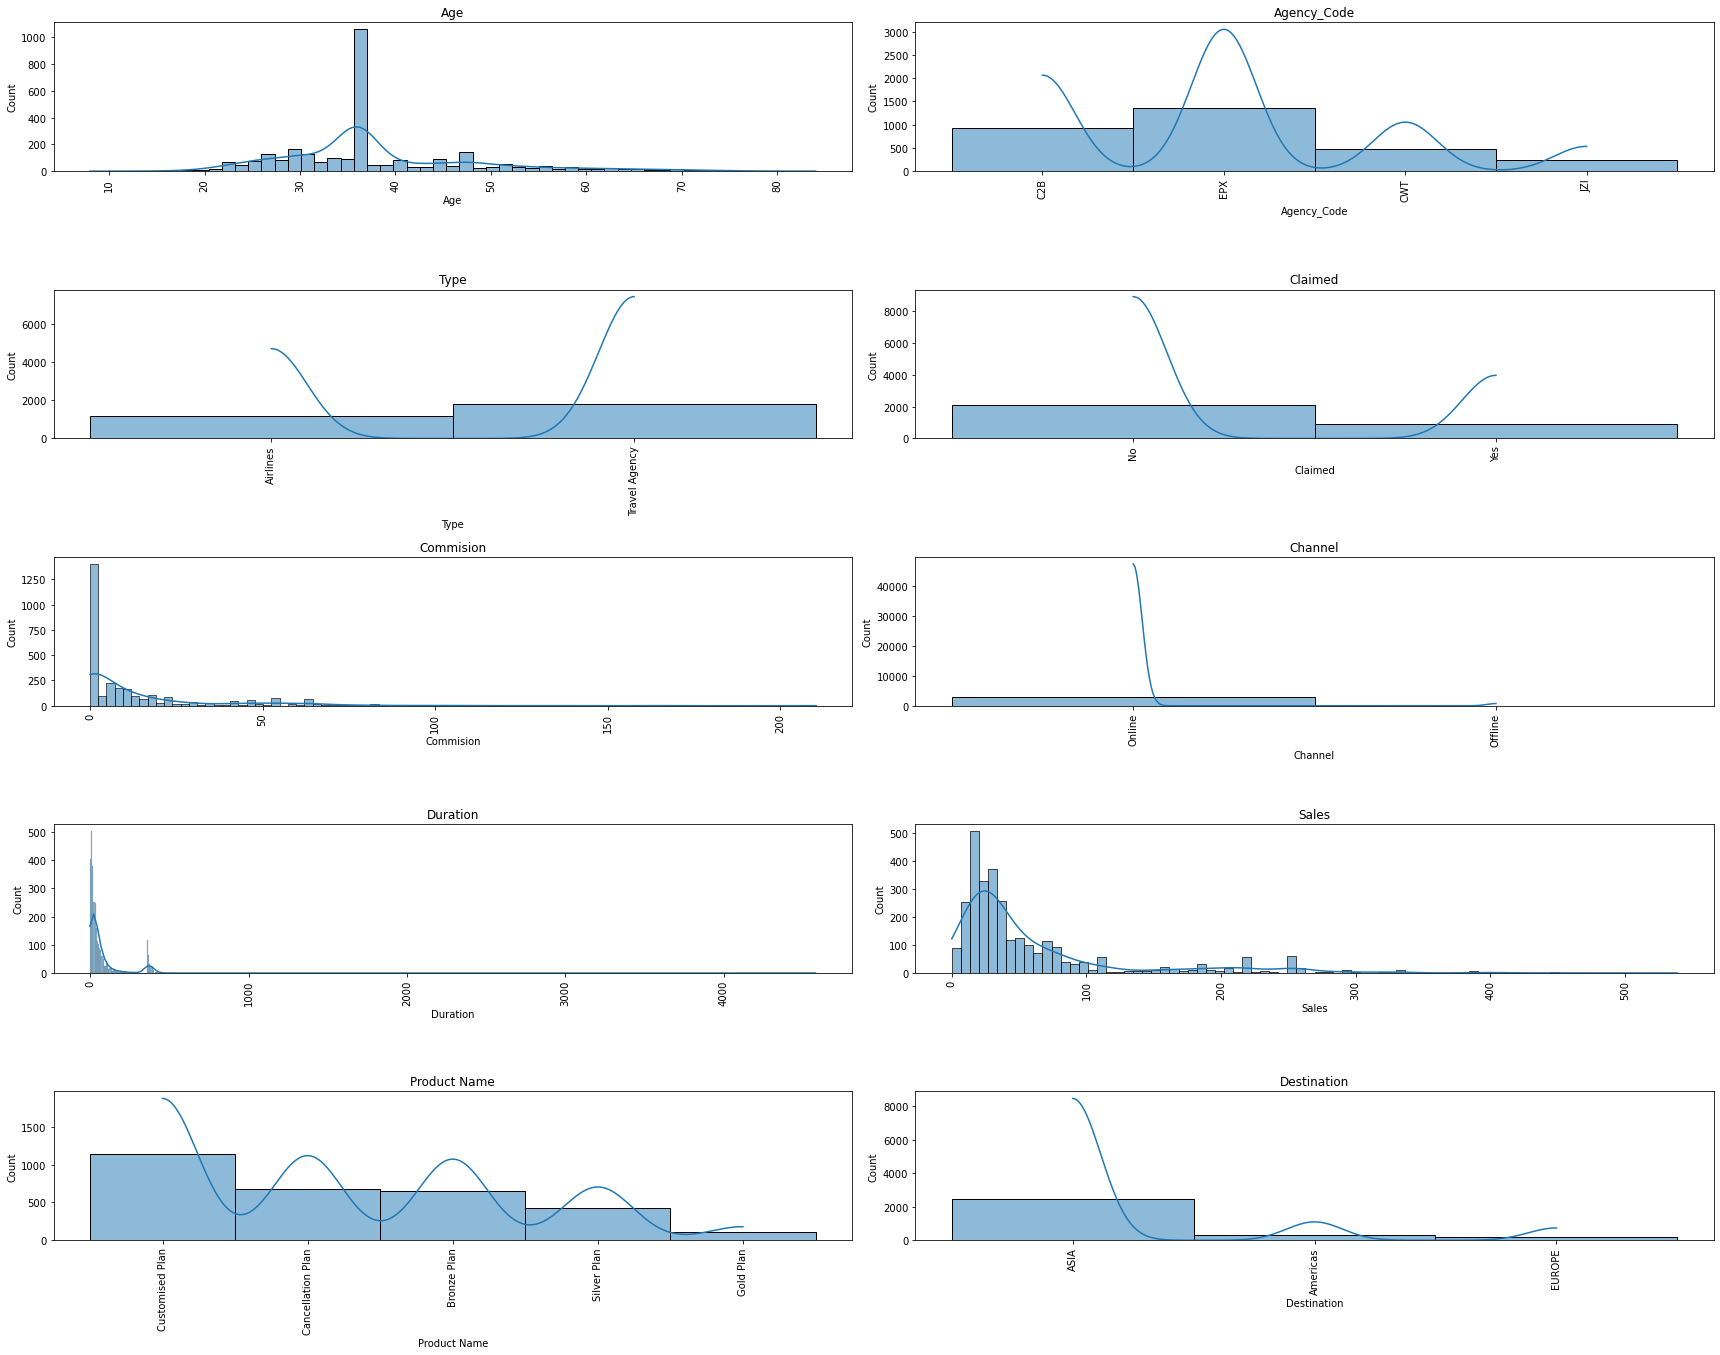

In [177]:
insurance_col = insurance.columns
a = len(insurance_col)
b = 2
c = 1 
fig = plt.figure(figsize=(24,36))
for i in insurance_col:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    plt.xlabel(i)
    sns.histplot(insurance[i],kde='True')
    plt.xticks(rotation=90)
    c = c + 1
plt.tight_layout()
plt.show()

<AxesSubplot:>

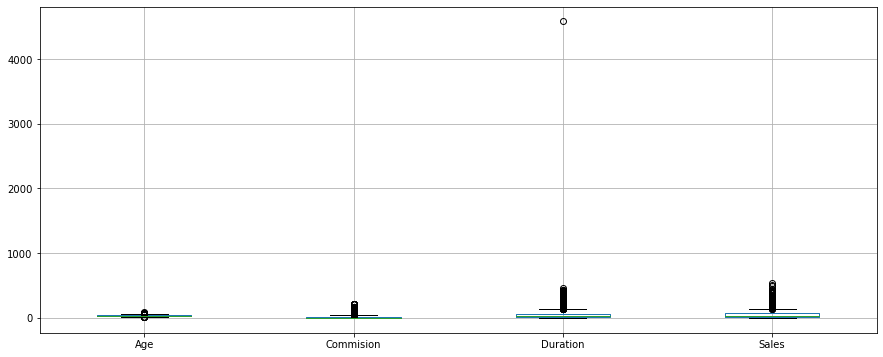

In [178]:
plt.figure(figsize=(15,6))
insurance.boxplot()

<AxesSubplot:xlabel='Sales'>

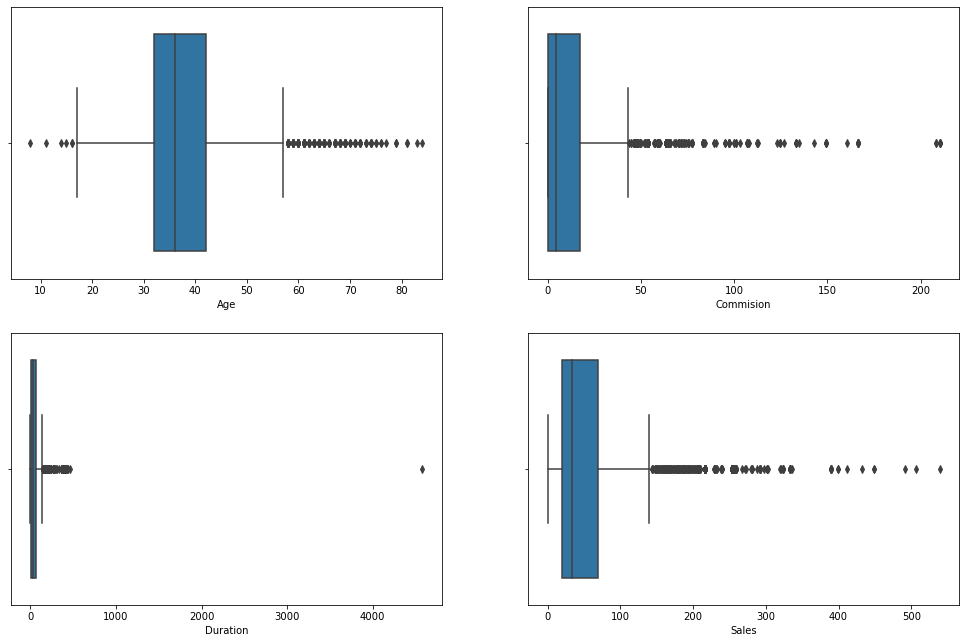

In [179]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(17,11)
sns.boxplot(x='Age', data=insurance, ax=axes[0][0])
sns.boxplot(x='Commision', data=insurance, ax=axes[0][1])
sns.boxplot(x='Duration', data=insurance, ax=axes[1][0])
sns.boxplot(x='Sales', data=insurance , ax=axes[1][1])

In [180]:
insurance.skew()

Age           1.149713
Commision     3.148858
Duration     13.784681
Sales         2.381148
dtype: float64

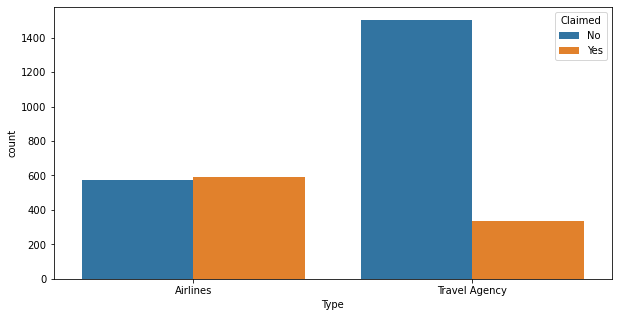

In [190]:
plt.figure(figsize=(10,5))
sns.countplot(x='Type', hue='Claimed', data=insurance);

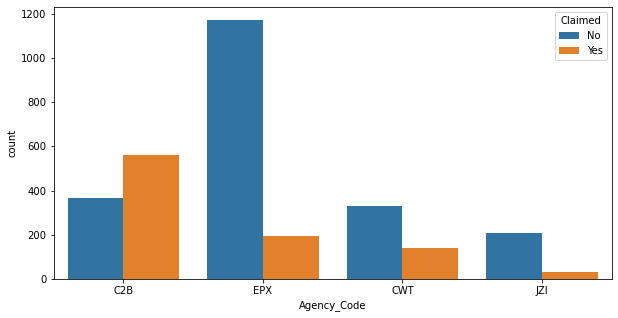

In [191]:
plt.figure(figsize=(10,5))
sns.countplot(x='Agency_Code', hue='Claimed', data=insurance);

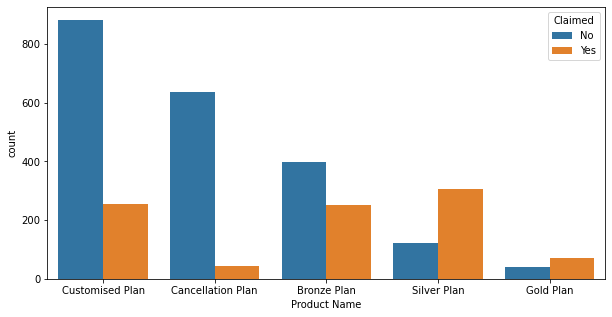

In [192]:
plt.figure(figsize=(10,5))
sns.countplot(x='Product Name', hue='Claimed', data=insurance);

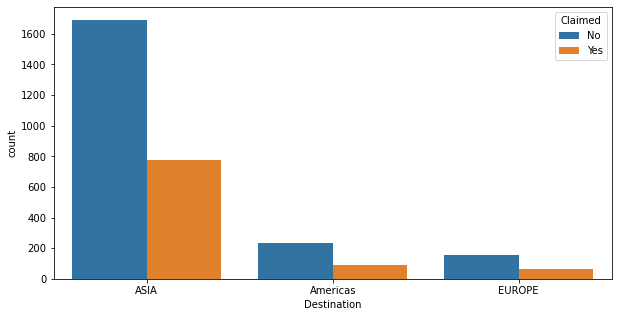

In [195]:
plt.figure(figsize=(10,5))
sns.countplot(x='Destination', hue='Claimed', data=insurance);

In [181]:
def find_outliers_IQR(insurance):

   q1=insurance.quantile(0.25)

   q3=insurance.quantile(0.75)

   IQR=q3-q1

   outliers1 = insurance[((insurance<(q1-1.5*IQR)) | (insurance>(q3+1.5*IQR)))]

   return outliers1

In [182]:
outliers1 = find_outliers_IQR(insurance[['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination']])

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

outliers1

number of outliers: 210
max outlier value: spending                           NaN
advance_payments                   NaN
probability_of_full_payment     0.8099
current_balance                    NaN
credit_limit                       NaN
min_payment_amt                 8.4560
max_spent_in_single_shopping       NaN
dtype: float64
min outlier value: spending                           NaN
advance_payments                   NaN
probability_of_full_payment     0.8081
current_balance                    NaN
credit_limit                       NaN
min_payment_amt                 8.3150
max_spent_in_single_shopping       NaN
dtype: float64


Age Agency_Code Type Claimed  Commision Channel  Duration  Sales  \
0     NaN         NaN  NaN     NaN        NaN     NaN       NaN    NaN   
1     NaN         NaN  NaN     NaN        NaN     NaN       NaN    NaN   
2     NaN         NaN  NaN     NaN        NaN     NaN       NaN    NaN   
3     NaN         NaN  NaN     NaN        NaN     NaN       NaN    NaN   
4     NaN         NaN  NaN     NaN        NaN     NaN       NaN    NaN   
...   ...         ...  ...     ...        ...     ...       ...    ...   
2995  NaN         NaN  NaN     NaN     166.53     NaN     364.0  256.2   
2996  NaN         NaN  NaN     NaN        NaN     NaN       NaN    NaN   
2997  NaN         NaN  NaN     NaN        NaN     NaN       NaN    NaN   
2998  NaN         NaN  NaN     NaN        NaN     NaN       NaN    NaN   
2999  NaN         NaN  NaN     NaN        NaN     NaN       NaN    NaN   

     Product Name Destination  
0             NaN         NaN  
1             NaN         NaN  
2             NaN         NaN  
3             NaN         NaN  
4             NaN         NaN  
...           ...         ...  
2995          NaN         NaN  
2996          NaN         NaN  
2997          NaN         NaN  
2998          NaN         NaN  
2999          NaN         NaN  

[3000 rows x 10 columns]

In [184]:
outliers1.nunique()

Age              29
Agency_Code       0
Type              0
Claimed           0
Commision        74
Channel           0
Duration        118
Sales           123
Product Name      0
Destination       0
dtype: int64

In [187]:
insurance.skew()

Age           1.149713
Commision     3.148858
Duration     13.784681
Sales         2.381148
dtype: float64

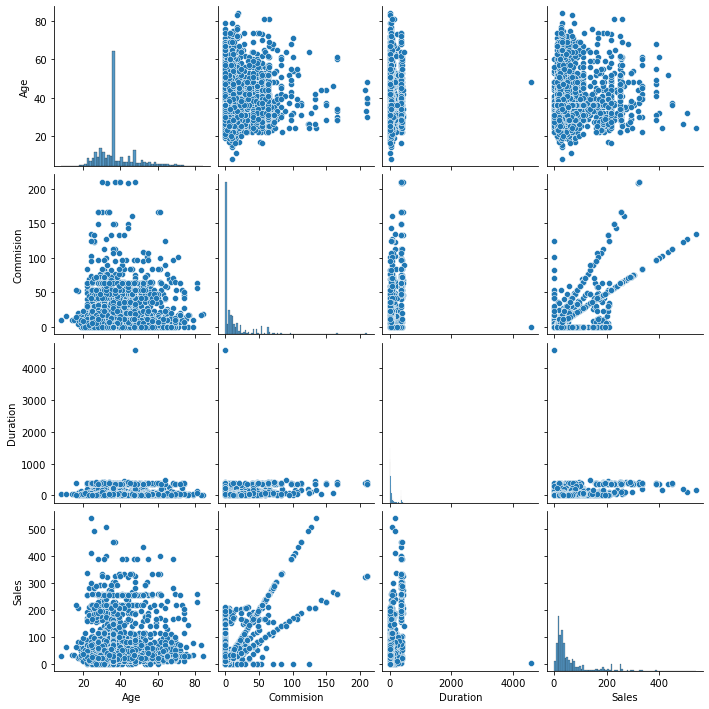

In [144]:
sns.pairplot(data = insurance);

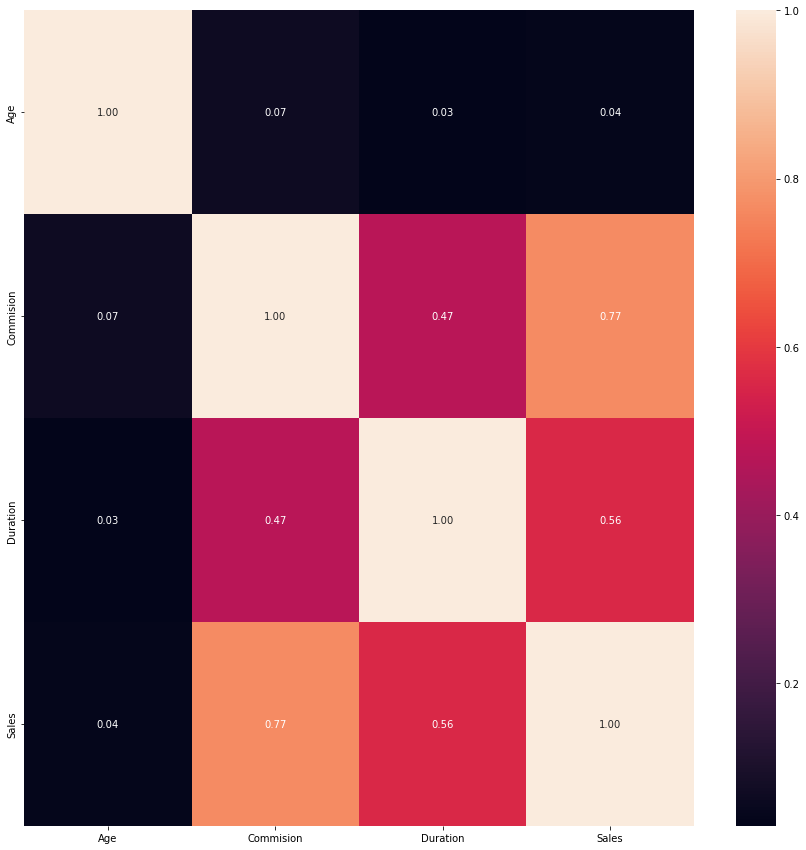

In [145]:
plt.figure(figsize=(15,15))
sns.heatmap(insurance.corr(),annot=True,fmt=".2f");

In [146]:
insurance.var()

Age            109.485214
Commision      649.304524
Duration     17970.290762
Sales         5003.292182
dtype: float64

In [147]:
insurance.std()

Age           10.463518
Commision     25.481455
Duration     134.053313
Sales         70.733954
dtype: float64

In [148]:
from scipy import stats
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from warnings import filterwarnings
filterwarnings("ignore")

In [149]:
for feature in insurance.columns: 
    if insurance[feature].dtype == 'object': 
        insurance[feature] = pd.Categorical(insurance[feature]).codes

In [150]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


## 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest

In [151]:
X = insurance.drop("Claimed" , axis=1)

y = insurance.pop("Claimed")


In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [153]:
dt_model = DecisionTreeClassifier(criterion = 'gini',random_state=1)
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

In [154]:
y_predict = dt_model.predict(X_test)

In [155]:
accuracy_score(test_labels,y_predict)

0.7177777777777777

In [156]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

In [157]:
from sklearn import tree

train_char_label = ['No', 'Yes']
insurance_Tree_File = open('d:\insurance.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=insurance_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

insurance_Tree_File.close()


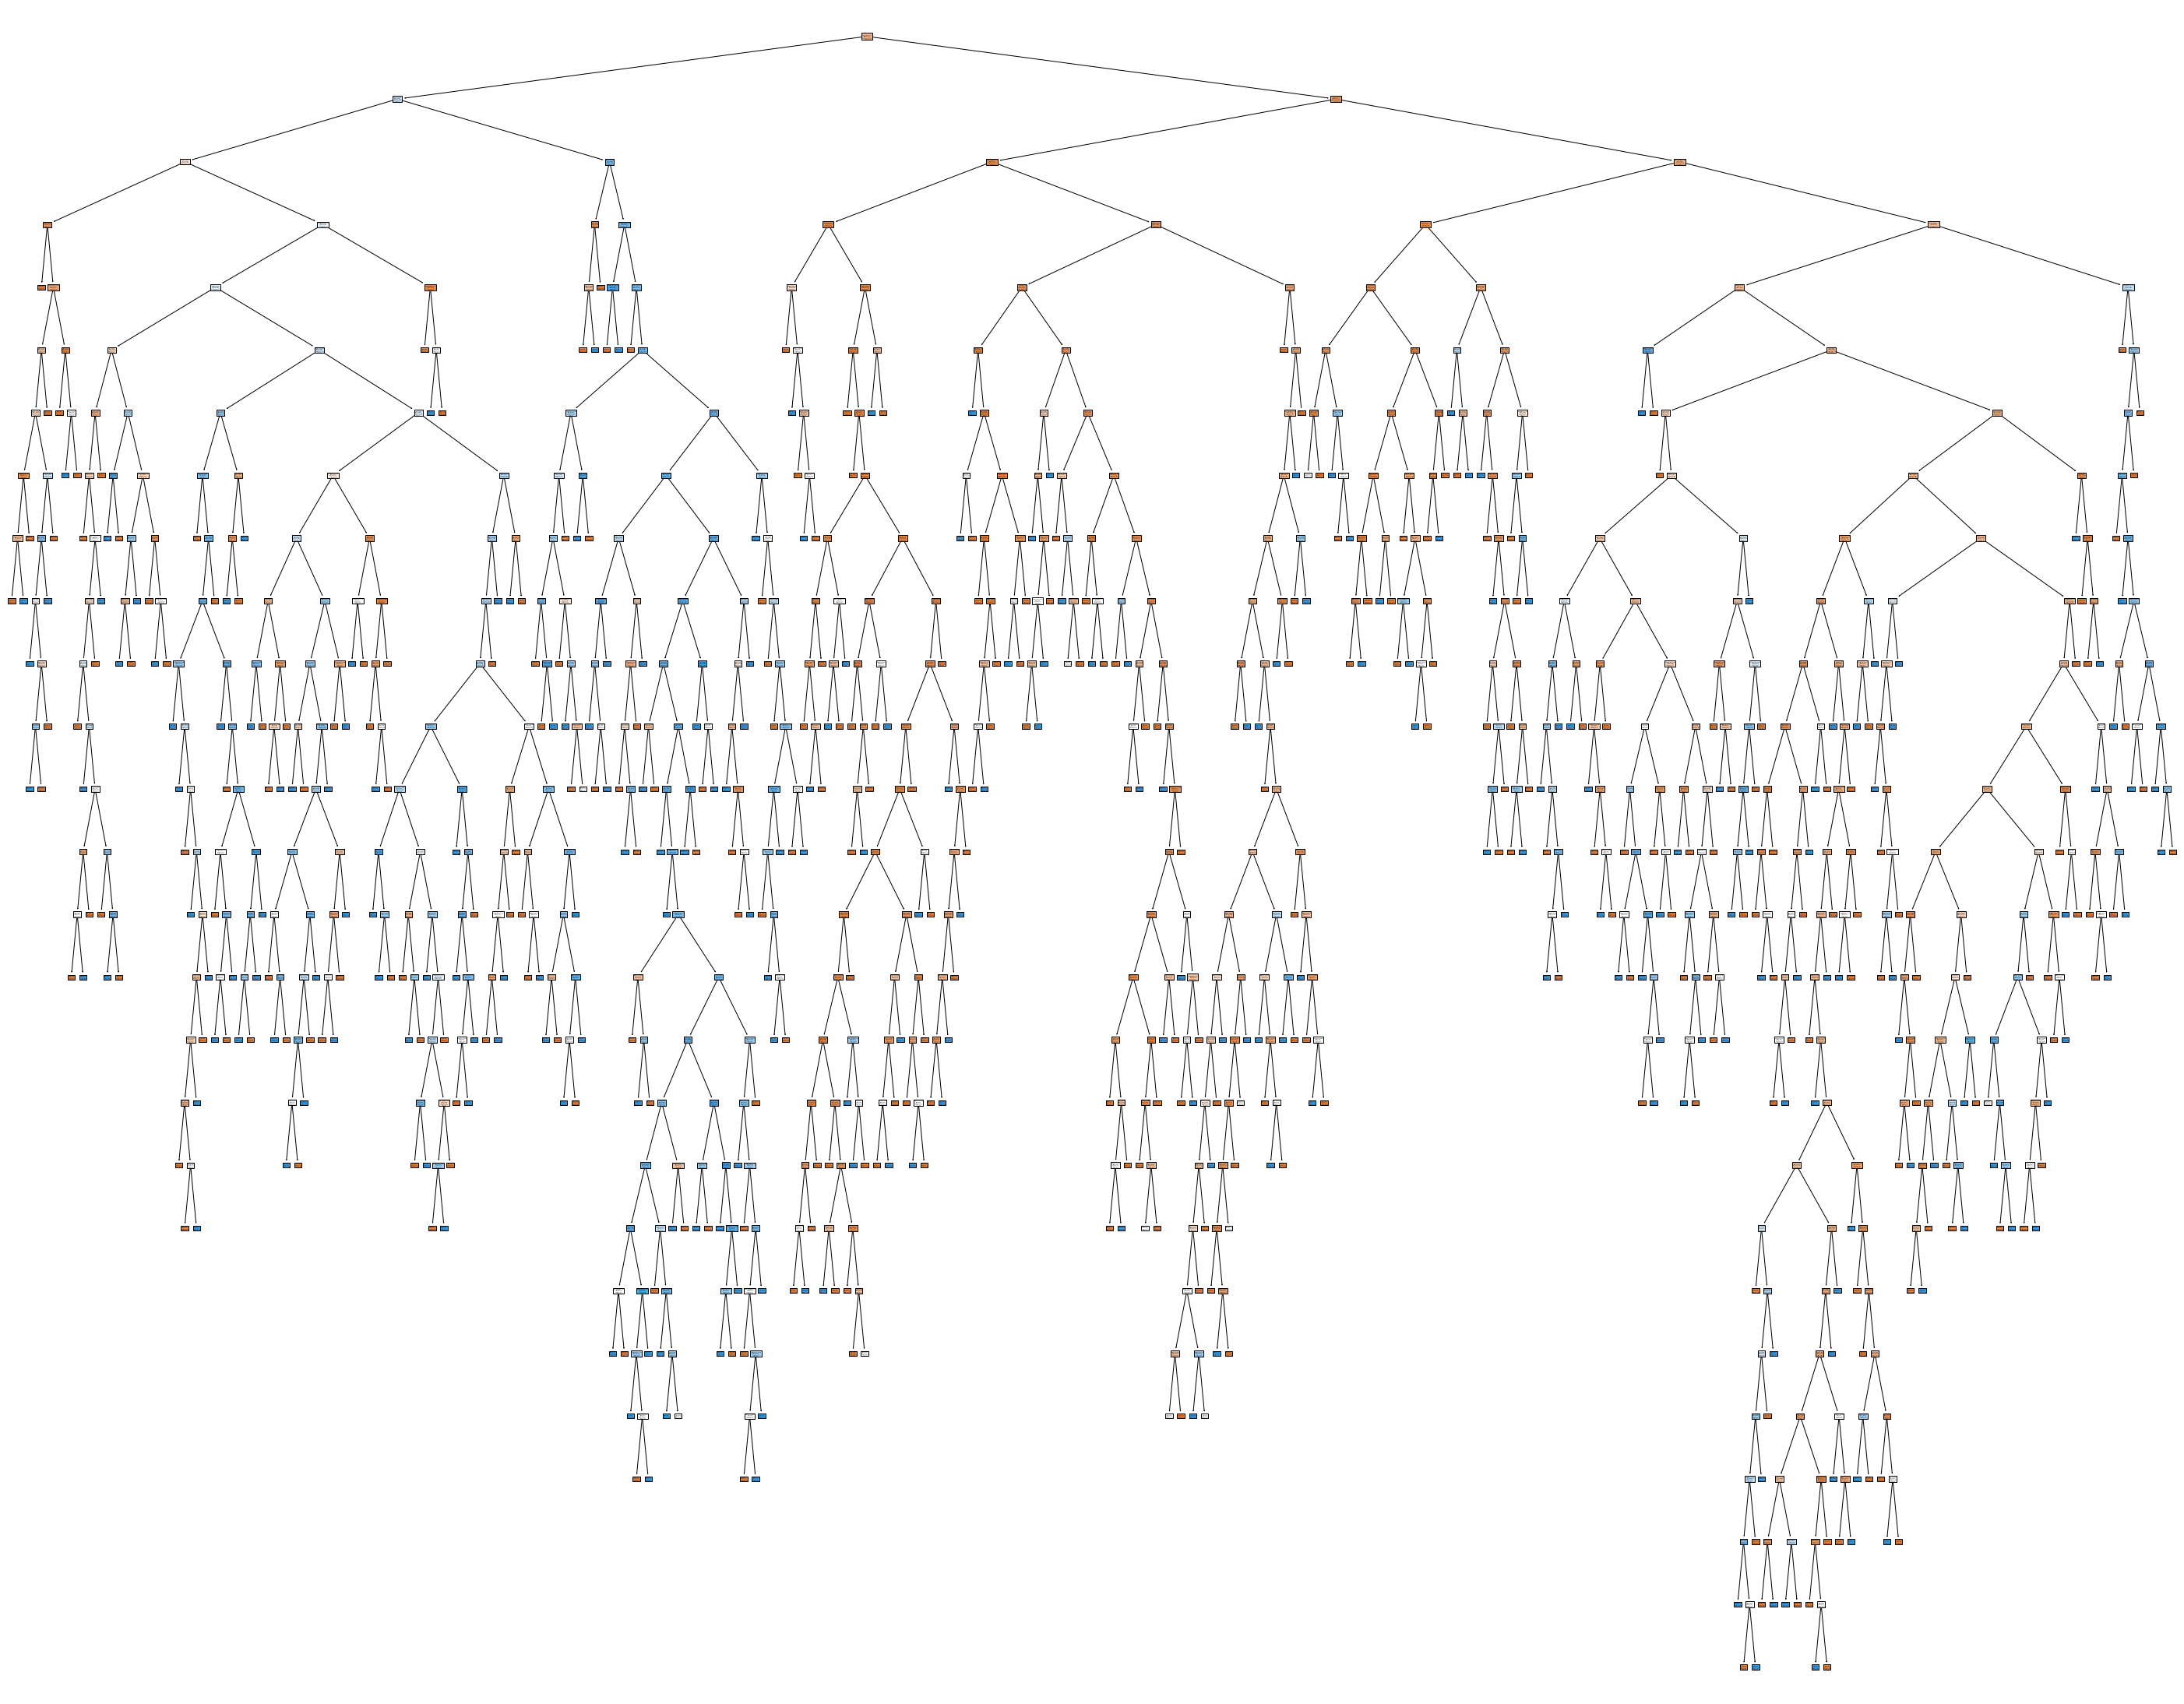

In [158]:
plt.figure(figsize=(50,40))
plot_tree(dt_model, feature_names=X_train.columns, class_names=['0','1'], filled = True)
plt.show()

In [159]:
#choosing a correct value of Max depth
accuracy_values_on_test=[]
for depth in range(2,30,3):
    model = DecisionTreeClassifier(criterion = 'gini',random_state=1,max_depth=depth)
    model.fit(X_train, train_labels)
    y_predict=model.predict(X_test)
    accuracy_values_on_test.append(accuracy_score(test_labels,y_predict))

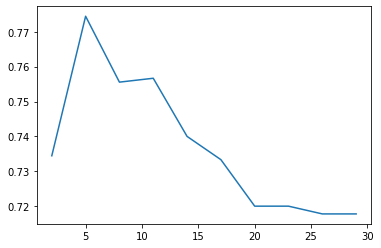

In [160]:
plt.plot(range(2,30,3), accuracy_values_on_test)

In [161]:
#best value as observed is max_depth of 5

In [162]:
best_model = DecisionTreeClassifier(criterion = 'gini',random_state=1,max_depth=5)
best_model.fit(X_train, train_labels)
y_predict=best_model.predict(X_test)
accuracy_score(test_labels,y_predict)

0.7744444444444445

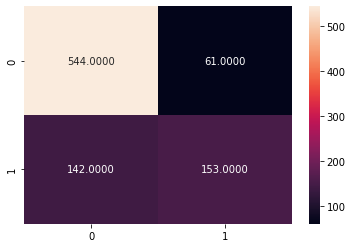

In [163]:
sns.heatmap(confusion_matrix(test_labels, y_predict),annot=True,fmt='.4f');

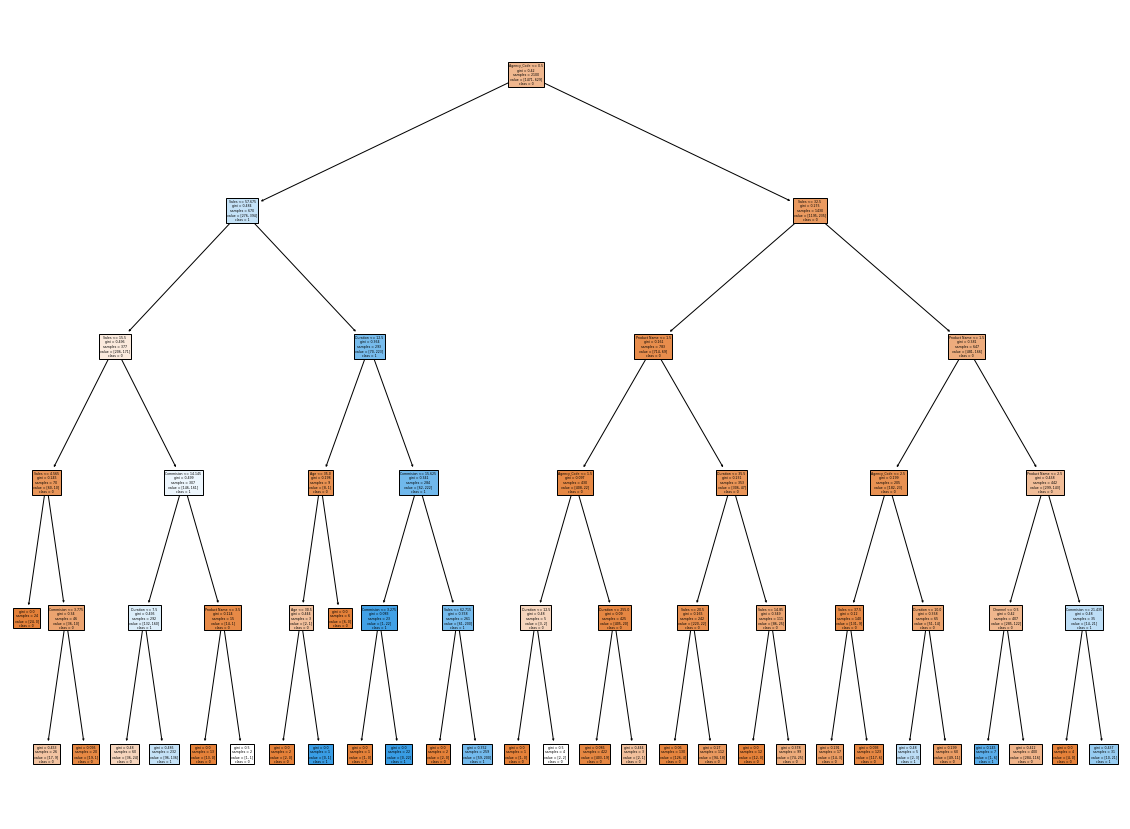

In [164]:
fig = plt.figure(figsize=(20,15))
plot_tree(best_model, feature_names=X_train.columns, class_names=['0','1'], filled = True)
plt.show()
fig.savefig("decistion_tree.png")

In [201]:
best_model = DecisionTreeClassifier(criterion = 'gini',random_state=1,max_depth=4)
best_model.fit(X_train, train_labels)
y_predict=best_model.predict(X_test)
accuracy_score(test_labels,y_predict)

0.7811111111111111

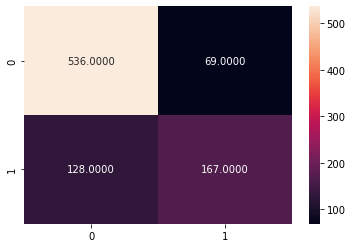

In [202]:
sns.heatmap(confusion_matrix(test_labels, y_predict),annot=True,fmt='.4f');

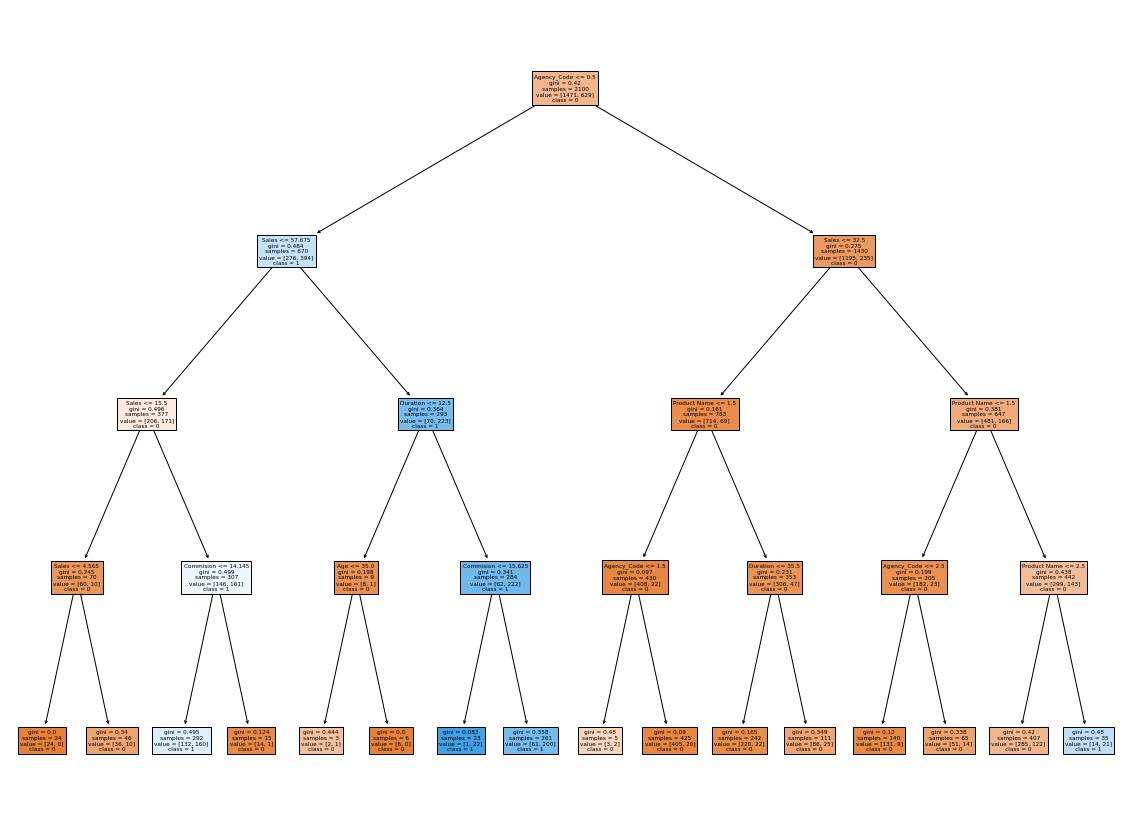

In [203]:
fig = plt.figure(figsize=(20,15))
plot_tree(best_model, feature_names=X_train.columns, class_names=['0','1'], filled = True)
plt.show()

In [204]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.177894
Agency_Code   0.194770
Type          0.000383
Commision     0.095127
Channel       0.007262
Duration      0.262122
Sales         0.199864
Product Name  0.043258
Destination   0.019321


In [165]:
rf_accuracy_values_on_test=[]
for depth in range(2,30,3):
    model = RandomForestClassifier(n_estimators = 1000,random_state=0,max_depth=depth)
    model.fit(X_train, train_labels)
    y_predict=model.predict(X_test)
    rf_accuracy_values_on_test.append(accuracy_score(test_labels,y_predict))

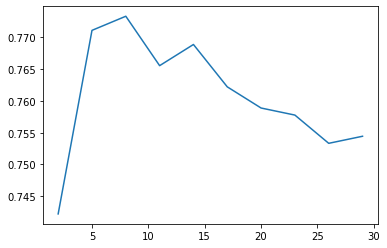

In [166]:
plt.plot(range(2,30,3), rf_accuracy_values_on_test)

In [205]:
best_model_rf = RandomForestClassifier(n_estimators = 1000,random_state=0,max_depth=8)
best_model_rf.fit(X_train, train_labels)
y_predict=best_model_rf.predict(X_test)
accuracy_score(test_labels,y_predict)

0.7733333333333333

In [206]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,7,10],
    'max_features': [4,6],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100,200,300]
}

rfcl = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)


In [207]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 200, 300]})

In [208]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 300}

In [209]:
best_grid = grid_search.best_estimator_

In [210]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model.

In [211]:
from sklearn.metrics import confusion_matrix,classification_report

In [212]:
confusion_matrix(train_labels,ytrain_predict)

array([[1316,  155],
       [ 247,  382]], dtype=int64)

In [213]:
confusion_matrix(test_labels,ytest_predict)

array([[552,  53],
       [149, 146]], dtype=int64)

In [214]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1471
           1       0.71      0.61      0.66       629

    accuracy                           0.81      2100
   macro avg       0.78      0.75      0.76      2100
weighted avg       0.80      0.81      0.80      2100



In [215]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       605
           1       0.73      0.49      0.59       295

    accuracy                           0.78       900
   macro avg       0.76      0.70      0.72       900
weighted avg       0.77      0.78      0.76       900



In [216]:
import matplotlib.pyplot as plt

AUC: 0.853


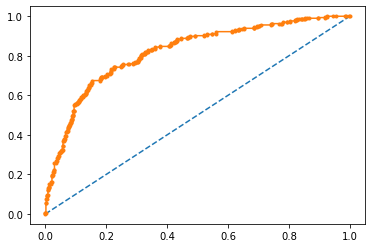

In [226]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr_rf_train, tpr_rf_train, thresholds_rf_train = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.820


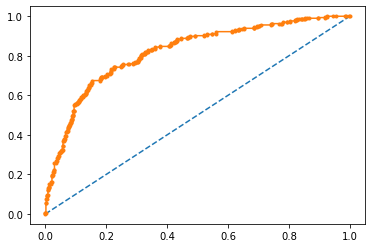

In [227]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr_rf_test, tpr_rf_test, thresholds_rf_test = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [220]:
accuracy_score(train_labels,ytrain_predict)

0.8085714285714286

In [221]:
accuracy_score(test_labels,ytest_predict)

0.7755555555555556

AUC: 0.833


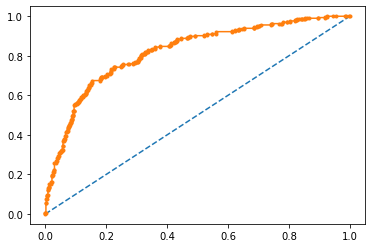

In [228]:
# AUC and ROC for the training data

# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr_cart_train, tpr_cart_train, thresholds_cart_train = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.798


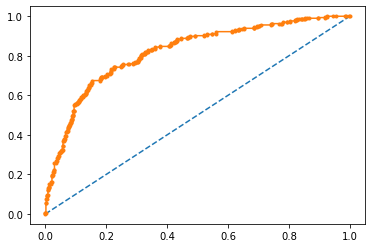

In [229]:
# AUC and ROC for the test data


# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr_cart_test, tpr_cart_test, thresholds_cart_test = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

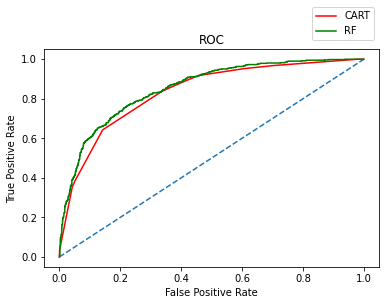

In [230]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_cart_train, tpr_cart_train,color='red',label="CART")
plt.plot(fpr_rf_train,tpr_rf_train,color='green',label="RF")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

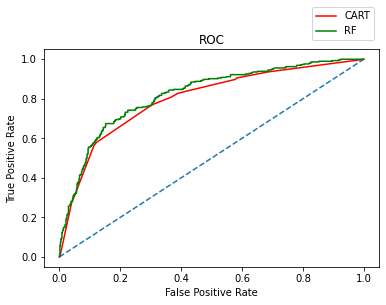

In [231]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_cart_test, tpr_cart_test,color='red',label="CART")
plt.plot(fpr_rf_test,tpr_rf_test,color='green',label="RF")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')